In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries & Functions

In [ ]:
def checking_Unbiasity(y, title):
    plt.figure(figsize=(7,6))
    labels = 'BurnOut-Stressed', 'Satisfied' #, 'Stressed'
    a = y[y[:] == 0].size
    b = y[y[:] == 1].size
    #c = y[y[:] == 2].size
    sizes = [a,b] #,c]
    colors = ['lightcoral', 'teal'] #, 'skyblue']
    explode = (a/5000, b/5000) #, c/5000)
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

history_common_train = [0.5, 0.53, 0.60, 0.67, 0.70, 0.73, 0.75, 0.80, 0.82, 0.83]
history_common_test = [0.4, 0.43, 0.55, 0.67, 0.63, 0.70, 0.78, 0.73, 0.78, 0.80]
history_losstr = [2.0, 1.9, 1.6, 1.5, 1.2, 1.0, 1.0, 0.9, 0.85, 0.65]
history_lossts = [2.0+0.5, 1.9+0.4, 1.6+0.1, 1.5+0.7, 1.2+0.1, 1.0+0.2, 1.0+0.3, 0.9+0.1, 0.85+0.2, 0.65]

In [ ]:
def plotting_ECG(data, title, record=0):
  yy=list(range(0,data.shape[1]))
  plt.figure(figsize=(20,10))
  plt.plot(yy,data[record, :, 0])
  plt.plot(yy,data[record, :, 1])
  plt.plot(yy,data[record, :, 2])
  plt.plot(yy,data[record, :, 3])
  plt.plot(yy,data[record, :, 4])
  plt.plot(yy,data[record, :, 5])
  plt.plot(yy,data[record, :, 6])
  plt.plot(yy,data[record, :, 7])
  plt.plot(yy,data[record, :, 8])
  plt.plot(yy,data[record, :, 9])
  plt.plot(yy,data[record, :, 10])
  plt.plot(yy,data[record, :, 11])
  plt.title(title)

In [ ]:
import pandas as pd
import numpy as np
import torch
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import StratifiedKFold
import math
import os
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import files
from scipy.io import loadmat
import io
from tensorflow.keras import optimizers
import joblib
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# import wfdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import concatenate
# from keras.utils import plot_model
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, load_model

leads = 12
num_classes = 2
def checking_accuracy(y_test,y_pred):
  n=0
  j=0
  while (j<y_test.size): #test_accuracy
    if (y_pred[j] == y_test[j]):
      n+=1
    j+=1
  accu = n/j
  return accu

def change_labelling(y):
  y[y[:] == 1] = 2
  y[y[:] == 0] = 1
  y[y[:] == 2] = 0
  return y

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

def heatMap(y_test, y_pred, figsize):
  log_cm = confusion_matrix(np.array(y_test).astype('int'), y_pred.astype('int'))
  # print(log_cm, type(log_cm))
  f, p = plt.subplots(figsize=figsize)
  sn.set(font_scale=2) # for label size
  sns.heatmap(log_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
  # plt.title('Confusion Matrix', size=16)
  # plt.xlabel('Predicted Labels', size=14)
  # plt.ylabel('Original Labels', size=14)
  plt.show()

def plotting_epochs(training_, validation_, lossOrAccu, figsize=[6, 4]):
  plt.figure(figsize=figsize)
  plt.plot(training_, 'black', linewidth=2.0)
  plt.plot(validation_, 'blue', linewidth=2.0)
  plt.legend(['Training '+lossOrAccu, 'Validation '+lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

def binaryClassifications(class1, X):
  y_t = np.array(Y['diagnostic_superclass'])

  for i in range(y_t.size):
    if(y_t[i] == class1):
      y_t[i] = 1
    else:
      y_t[i] = 0

  test_fold = 10
  # Train
  X_train = X[np.where(Y.strat_fold != test_fold)]
  y_train = y_t[(Y.strat_fold != test_fold)]
  # Test
  X_test = X[np.where(Y.strat_fold == test_fold)]
  y_test = y_t[Y.strat_fold == test_fold]
  y_train = np.array(y_train)
  y_test = np.array(y_test)
  y_train = y_train.astype('int')
  y_test = y_test.astype('int')

  X_test1 = X[np.where(Y.strat_fold == test_fold)]
  y_test1 = y_t[Y.strat_fold == test_fold]
  num_classes = np.unique(y_t).shape[0]
  y_train = np_utils.to_categorical(y_train, num_classes)
  y_test = np_utils.to_categorical(y_test, num_classes)
  return X_train, y_train, X_test, y_test, X_test1, y_test1

def underSample(data, y_t):
  rus = RandomUnderSampler(random_state = 42)
  X_res, y_res = rus.fit_resample(data, y_t)
  X_res = X_res.reshape(X_res.shape[0], int(X_res.shape[1]/leads), leads)
  return X_res, y_res

def overSample(data, y_t):
  ros = RandomOverSampler(random_state = 42)
  X_res, y_res = ros.fit_resample(data, y_t)
  X_res = X_res.reshape(X_res.shape[0], int(X_res.shape[1]/leads), leads)
  return X_res, y_res

def inceptionShort(activation = 'relu', dropout=0.5, input_shape = (1000, 12)):
  input_layer = keras.layers.Input(input_shape)
  Z = input_layer
  Z_residual = input_layer

  obj = InceptionModule(activation=activation)
  Z = obj.call(Z)
  Z = shortcut_layer(Z_residual, Z, act=activation)

  gap_layer = keras.layers.GlobalAveragePooling1D()(Z)
  gap_layer = Dropout(dropout)(gap_layer)
  output_layer = keras.layers.Dense(num_classes, activation='softmax')(gap_layer)

  model = keras.models.Model(inputs=input_layer, outputs=output_layer)
  return model

class InceptionModule():
  def __init__(self, num_filters=32, activation='relu'):
    self.num_filters = num_filters
    self.act = activation
    # self.activation = keras.activations.get(activation)

  def call(self, inputs):
    Z_bottleneck = Conv1D(self.num_filters, 1, padding='same', activation=self.act)(inputs)
    Z_maxpool = MaxPooling1D(3, strides=1, padding='same')(inputs)

    conv1 = Conv1D(self.num_filters, 10, padding='same', activation=self.act)(Z_bottleneck)
    conv3 = Conv1D(self.num_filters, 20, padding='same', activation=self.act)(Z_bottleneck)
    conv5 = Conv1D(self.num_filters, 40, padding='same', activation=self.act)(Z_bottleneck)
    pool = MaxPooling1D(3, strides=1, padding='same')(Z_maxpool)

    Z = concatenate([conv1, conv3, conv5, pool], axis=2)
    Z = keras.layers.BatchNormalization()(Z)

    return keras.layers.Activation(self.act)(Z)

def shortcut_layer(inputs, Z_inception, act='relu'):

  Z_shortcut = keras.layers.Conv1D(filters=Z_inception.shape[-1], kernel_size=1, padding='same')(inputs)
  Z_shortcut = keras.layers.BatchNormalization()(Z_shortcut)

  Z = keras.layers.Add()([Z_shortcut, Z_inception])

  return keras.layers.Activation(act)(Z)

def checking_Unbiasity(y, title):
    plt.figure(figsize=(7,6))
    labels = 'BurnOut-Stressed', 'Satisfied' #, 'Stressed'
    a = y[y[:] == 0].size
    b = y[y[:] == 1].size
    #c = y[y[:] == 2].size
    sizes = [a,b] #,c]
    colors = ['lightcoral', 'teal'] #, 'skyblue']
    explode = (a/5000, b/5000) #, c/5000)
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

def checking_Unbiasity_MultiLabel(y, title):
    plt.figure(figsize=(7,6))
    labels = 'BurnOut-Stressed', 'Satisfied', 'Stressed'
    a = y[y[:] == 0].size
    b = y[y[:] == 1].size
    c = y[y[:] == 2].size
    sizes = [a,b,c]
    colors = ['lightcoral', 'teal', 'skyblue']
    explode = (a/5000, b/5000, c/5000)
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

def downSampleData(X):
  x = np.full((1501, 1000, 12), 1.0, dtype=float)
  for i in range(X.shape[0]):
    indx = 0
    for j in range(X.shape[1]):
      if (j%5 == 0 and j<5000):
        x[i][indx] = X[i][j] # + X[i][j+1] + X[i][j+2] + X[i][j+3] + X[i][j+4])/2
        indx += 1
  return x

In [ ]:
def populate_dict_with_module_objects(target_dict, modules, obj_filter):
  for module in modules:
    for name in dir(module):
      obj = getattr(module, name)
      if obj_filter(obj):
        target_dict[name] = obj
# class InceptionModule():
#   def __init__(self, num_filters=32, activation='relu'):
#     self.num_filters = num_filters
#     self.activation = keras.activations.get(activation)

#   def call(self, inputs):
#     Z_bottleneck = Conv1D(self.num_filters, 1, padding='same', activation='relu')(inputs)
#     Z_maxpool = MaxPooling1D(3, strides=1, padding='same')(inputs)

#     conv1 = Conv1D(self.num_filters, 10, padding='same', activation='relu')(Z_bottleneck)
#     conv3 = Conv1D(self.num_filters, 20, padding='same', activation='relu')(Z_bottleneck)
#     conv5 = Conv1D(self.num_filters, 40, padding='same', activation='relu')(Z_bottleneck)
#     pool = MaxPooling1D(3, strides=1, padding='same')(Z_maxpool)

#     Z = concatenate([conv1, conv3, conv5, pool], axis=2)
#     Z = keras.layers.BatchNormalization()(Z)

#     return keras.layers.Activation('relu')(Z)

# def shortcut_layer(inputs, Z_inception):

#   Z_shortcut = keras.layers.Conv1D(filters=Z_inception.shape[-1], kernel_size=1, padding='same')(inputs)
#   Z_shortcut = keras.layers.BatchNormalization()(Z_shortcut)

#   Z = keras.layers.Add()([Z_shortcut, Z_inception])

#   return keras.layers.Activation('relu')(Z)

def Inception_Deep(input_shape, num_classes, dropout=0.5, num_modules=6):
  input_layer = layers.Input(input_shape)
  Z = input_layer
  Z_residual = input_layer

  for i in range(6):
    obj = InceptionModule()
    Z = obj.call(Z)
    if i%3 == 2:
      Z = shortcut_layer(Z_residual, Z)
      Z_residual = Z

  gap_layer = layers.GlobalAveragePooling1D()(Z)
  gap_layer = Dropout(dropout)(gap_layer)
  output_layer = Dense(num_classes, activation='softmax')(gap_layer)

  model = Model(inputs=input_layer, outputs=output_layer)

  return model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1
		# define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs

    # loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)
		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")
  # start building the decoder model which will accept the
		# output of the encoder as its inputs
		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)
		# build the decoder model
		decoder = Model(latentInputs, outputs, name="decoder")
		# our autoencoder is the encoder + decoder
		autoencoder = Model(inputs, decoder(encoder(inputs)),
			name="autoencoder")
		# return a 3-tuple of the encoder, decoder, and autoencoder
		return (encoder, decoder, autoencoder)


## Wave + HRV data loading

In [ ]:
X = joblib.load('/content/drive/MyDrive/Capstone_Work/UseThis_Ecgs_for_HRVS_PCA300')
# bo = np.array(X[:208, :, :])
# sts = np.array(X[208:208+407, :, :])
# stf = np.array(X[208+407:, :, :])
# print(bo.shape, sts.shape, stf.shape)
# X = np.concatenate((bo, sts))
# X = np.concatenate((X, stf))
print(X.shape)

(1469, 300, 12)


In [ ]:
hrv_data = pd.read_csv('/content/drive/MyDrive/Capstone_Work/Usethis_HRVs_Age.csv')
hrv_data

subject_id     cvnni      cvsd  ...  Hypertension   Smoking  labels
0         BGH25  0.039971  0.045497  ...              0        0       0
1          D123  0.031521  0.034556  ...              0        0       0
2           D28  0.032754  0.036347  ...              0        1       0
3           D15  0.024119  0.034638  ...              0        0       0
4           D89  0.023736  0.018617  ...              0        1       0
...         ...       ...       ...  ...            ...      ...     ...
1464      RR300  0.007451  0.005620  ...              0        0       1
1465      RR298  0.010865  0.015111  ...              1        0       1
1466      RR287  0.055893  0.052930  ...              1        0       1
1467      RR285  0.045585  0.034347  ...              0        0       1
1468      RR291  0.027700  0.017111  ...              0        0       1

[1469 rows x 33 columns]

In [ ]:
X_hrv = hrv_data.iloc[:, 1:-1].values
X_hrv.shape

(1469, 31)

In [ ]:
y_hrv = np.array(hrv_data['labels'])
y_hrv

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
def inceptionShort_hrv(activation = 'relu', dropout=0.5, input_shape = (1000, 12), hrv_feature_count=31):
  input_layer = keras.layers.Input(input_shape)
  Z = input_layer
  Z_residual = input_layer
  input_layer1 = keras.layers.Input((hrv_feature_count))

  obj = InceptionModule(activation=activation)
  Z = obj.call(Z)
  Z = shortcut_layer(Z_residual, Z, act=activation)

  gap_layer = keras.layers.GlobalAveragePooling1D()(Z)
  gap_layer = Dropout(dropout)(gap_layer)
  gap_layer = concatenate([gap_layer, input_layer1], axis=1)

  Z1 = keras.layers.Dense(64, activation='relu')(gap_layer)
  Z1 = keras.layers.Dense(16, activation='relu')(Z1)

  output_layer = keras.layers.Dense(num_classes, activation='softmax')(Z1)

  model = keras.models.Model([input_layer, input_layer1], outputs=output_layer)
  return model


# Check AUC, Precision, Recall, F1-score curves

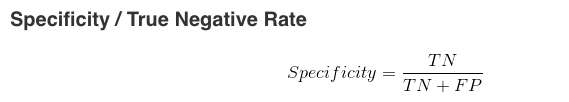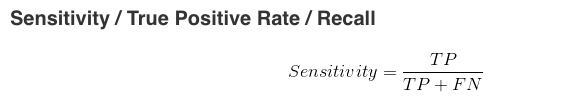

In [ ]:
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

In [ ]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from tensorflow.keras import optimizers
import numpy

def CV(folds):

    C = 1
    # aucs = []
    prec = []
    rec = []
    dice_scores = []
    while C < 6:
        print('FOLD: ', C)

        num_classes = 2
        # X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C))
        # y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C))
        # X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))
        # joblib.load(X_input[train], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_train_'+str(C))

        X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
        y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
        y_test = change_labelling(y_test)
        X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))
        # joblib.load(X_input[test], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_Test_'+str(C))

        # y_test1=utils.to_categorical(y_test, num_classes)
        # y_train=utils.to_categorical(y_train, num_classes)

        model1 = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAHRV__'+str(C)+'.h5')
        predictions = model1.predict((X_test, X_hrv_test))
        y_pred = np.argmax(predictions, axis = 1)
        # print(predictions.shape)
        # aucs.append(scores[2])

        plt.style.use('seaborn')
        prec.append(metrics.precision_score(y_test, y_pred))
        rec.append(metrics.recall_score(y_test, y_pred))

        lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, predictions[:, 1])

        # lr_f1, lr_auc = metrics.f1_score(y_test, y_pred), metrics.auc(lr_recall, lr_precision)
        # # summarize scores
        # print('Inception Short: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
        # # plot the precision-recall curves
        # no_skill = len(y_test[y_test==1]) / len(y_test)
        # plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        # plt.plot(lr_recall, lr_precision, marker='.', label='Inception Short')
        # # axis labels
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # # show the legend
        # plt.legend()
        # # show the plot
        # plt.show()

        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions[:, 1])

        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

        lr_f1, lr_auc = metrics.f1_score(y_test, y_pred), metrics.auc(lr_recall, lr_precision)
        # summarize scores
        print('Inception Naive: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
        # plot the precision-recall curves
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
        plt.plot(fpr, tpr, linestyle='--', label='Inception Naive', color='green')
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

        dice_score = dice(y_pred, y_test, k = 1)
        dice_scores.append(dice_score)
        C+=1

    # print('\n\n')
    # for i in range(0, folds):
    #     print('fold:',i+1,", test AUC:",aucs[i],"%")
    print('\n\n')
    for i in range(0, folds):
        print('fold:',i+1,", test Precision:",prec[i],"%")
    print('\n\n')
    for i in range(0, folds):
        print('fold:',i+1,", test Recall:",rec[i],"%")
    print('\n\n')
    for i in range(0, folds):
        print('fold:',i+1,", Dice Score:",dice_scores[i],"%")

    # print("after ",folds," Cross validation test AUC %.2f%% (+/- %.2f%%)" % (numpy.mean(aucs), numpy.std(aucs)))
    print("after ",folds," Cross validation test Precision  %.2f%% (+/- %.2f%%)" % (numpy.mean(prec), numpy.std(prec)))
    print("after ",folds," Cross validation test Recall %.2f%% (+/- %.2f%%)" % (numpy.mean(rec), numpy.std(rec)))
    print("after ",folds," Cross validation Dice Score %.2f%% (+/- %.2f%%)" % (numpy.mean(dice_scores), numpy.std(dice_scores)))

## Inception short on rmsprop

FOLD:  1
Inception Short: f1=0.910 auc=0.967


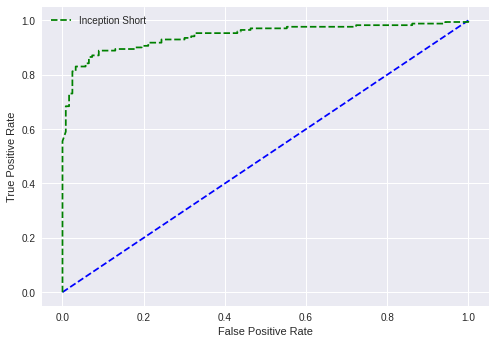

FOLD:  2
Inception Short: f1=0.901 auc=0.967


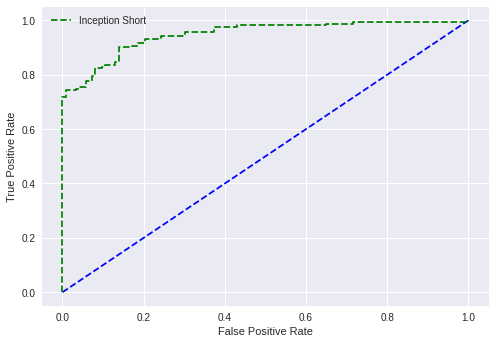

FOLD:  3
Inception Short: f1=0.949 auc=0.990


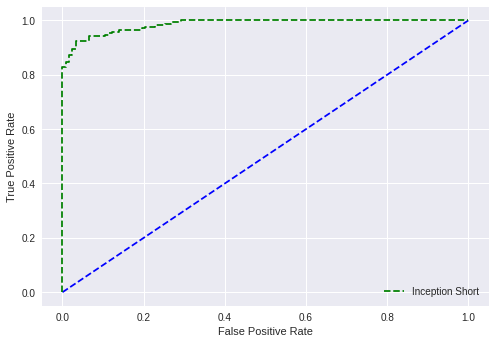

FOLD:  4
Inception Short: f1=0.910 auc=0.968


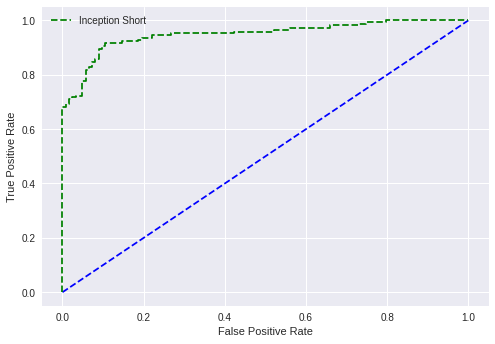

FOLD:  5
Inception Short: f1=0.881 auc=0.961


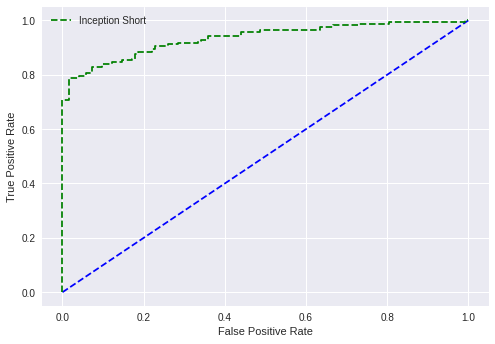




fold: 1 , test Precision: 0.9325153374233128 %
fold: 2 , test Precision: 0.9005847953216374 %
fold: 3 , test Precision: 0.9753086419753086 %
fold: 4 , test Precision: 0.926829268292683 %
fold: 5 , test Precision: 0.94 %



fold: 1 , test Recall: 0.8888888888888888 %
fold: 2 , test Recall: 0.9005847953216374 %
fold: 3 , test Recall: 0.9239766081871345 %
fold: 4 , test Recall: 0.8941176470588236 %
fold: 5 , test Recall: 0.8294117647058824 %



fold: 1 , Dice Score: 0.9101796407185628 %
fold: 2 , Dice Score: 0.9005847953216374 %
fold: 3 , Dice Score: 0.948948948948949 %
fold: 4 , Dice Score: 0.9101796407185628 %
fold: 5 , Dice Score: 0.88125 %
after  5  Cross validation test Precision  0.94% (+/- 0.02%)
after  5  Cross validation test Recall 0.89% (+/- 0.03%)
after  5  Cross validation Dice Score 0.91% (+/- 0.02%)


In [ ]:
CV(5)

In [ ]:
X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_1')
y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_1')
X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_1')
y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_1')

In [ ]:
y_test1 = utils.to_categorical(y_test, num_classes)
y_train1 = utils.to_categorical(y_train, num_classes)

In [ ]:
num_classes = 2
model=inceptionShort(input_shape=(300, 12), dropout=0.7)
opt = optimizers.RMSprop(momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 12)]    0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 300, 32)      416         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 300, 12)      0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 300, 32)      10272       conv1d_4[0][0]                   
____________________________________________________________________________________________

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import numpy

def CV(folds):

    n_fold=folds
    # kfold = StratifiedKFold(n_splits=n_fold, random_state=13)
    cvscores = []
    ap = 1
    C = 1
    cvcf1= []
    while C < 6:
        print('FOLD: ', C)

        num_classes = 2
        model=inceptionShort(input_shape=(300, 12), dropout=0.7)
        X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C))
        y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C))
        # X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))
        # joblib.load(X_input[train], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_train_'+str(C))

        X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
        y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
        # X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))
        # joblib.load(X_input[test], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_Test_'+str(C))

        y_test1=utils.to_categorical(y_test, num_classes)
        y_train1=utils.to_categorical(y_train, num_classes)

        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[f1_m])
        # mc = ModelCheckpoint('temp_model'+str(C-1)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
        # history_train = []
        # history_test = []
        # for epoch in range(200):
        # history = model.fit(X_train, y_train1, epochs=200, batch_size=16, validation_data=(X_test,y_test1), class_weight={0:1, 1:2}, verbose=0)
          # predictions = model.predict(X_test)
          # y_pred = np.argmax(predictions, axis = 1)
          # history_test.append(f1_score(y_test, y_pred))
          # predictions = model.predict(X_train)
          # y_pred = np.argmax(predictions, axis = 1)
          # history_train.append(f1_score(y_train, y_pred))
          # if epoch%10 == 0:
          #   print(epoch)
        # model1 = load_model('temp_model'+str(C-1)+'.h5')

        # scores = model.evaluate(X_test, y_test1, verbose=0)
        # print("test accuracy:   %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        # print("test F1 score: ",f1_score( y_test,np.argmax(model.predict(X_test), axis = 1))*100)
        # plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
        # plotting_epochs(history.history['loss'], history.history['val_loss'], 'LOSS')
        plotting_epochs(history.history['f1_m'], history.history['val_f1_m'], 'F1_score')
        # plotting_epochs(history.history['precision_m'], history.history['val_precision_m'], 'Precision')
        # plotting_epochs(history_train, history_test, 'F1-score')
        plt.show()
        # predictions = model.predict(X_test)
        # y_pred = np.argmax(predictions, axis = 1)

        # heatMap(y_test, y_pred, (6,6))
        # cvcf1.append(f1_score( y_test,np.argmax(model.predict(X_test), axis = 1))*100)
        # cvscores.append(scores[1] * 100)
        # predictions = model.predict(X[test])
        # y_pred = np.argmax(predictions, axis = 1)
        # heatMap(y[test], y_pred, (6,6))
        # ap += 1
        C+=1
    #     print("Last auc curve:", ap)
    # print('\n\n')
    # for i in range(0, n_fold):
    #     print('fold:',i+1,", test acc:",cvscores[i],"%")
    # print('\n\n')
    # for i in range(0, n_fold):
    #     print('fold:',i+1,", test f1 score:",cvcf1[i],"%")

    # print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    # print("after ",n_fold," Cross validation test f1 score  %.2f%% (+/- %.2f%%)" % (numpy.mean(cvcf1), numpy.std(cvcf1)))

FOLD:  1


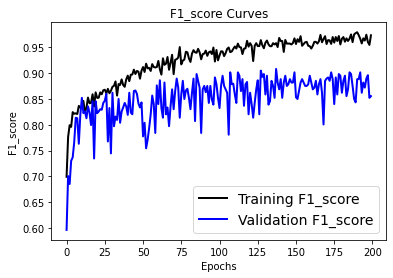

FOLD:  2


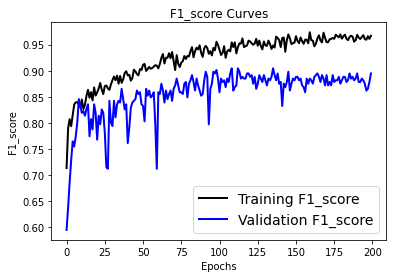

FOLD:  3


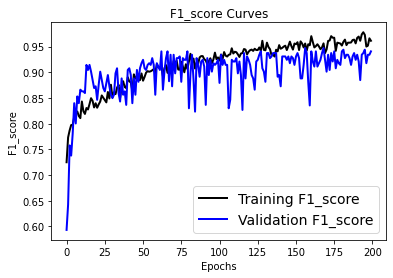

FOLD:  4


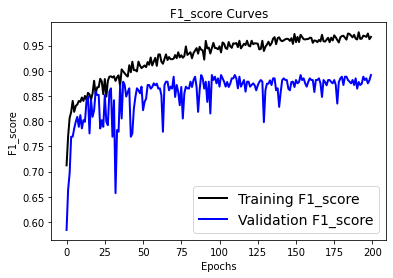

FOLD:  5


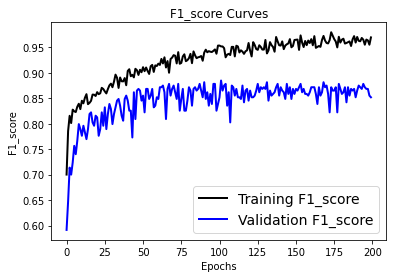

In [ ]:
CV(5)

FOLD:  1
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


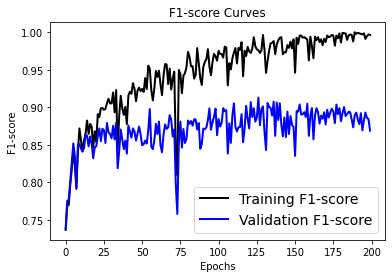

FOLD:  2
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


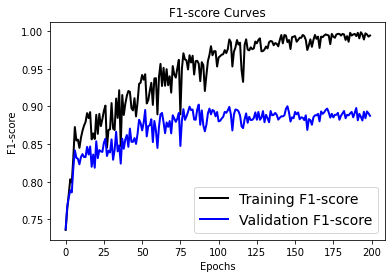

FOLD:  3
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


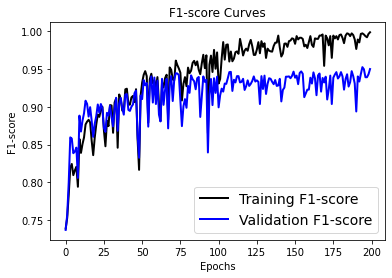

FOLD:  4
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


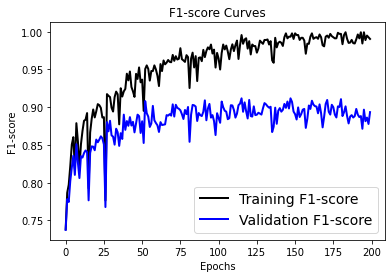

FOLD:  5
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


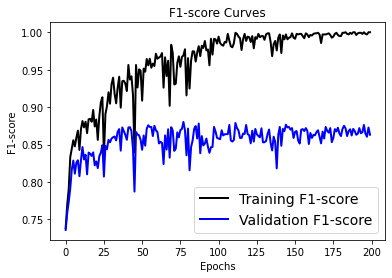

In [ ]:
CV(5)

## Inception short rmsprop + adadelta

FOLD:  1
Inception Short: f1=0.881 auc=0.962


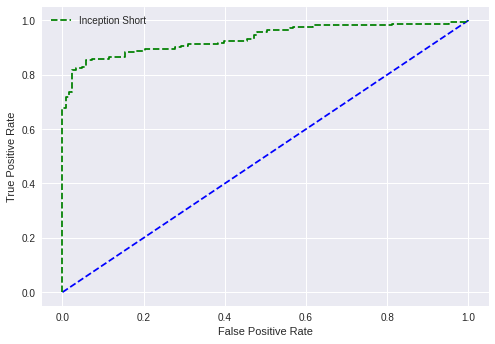

FOLD:  2
Inception Short: f1=0.888 auc=0.970


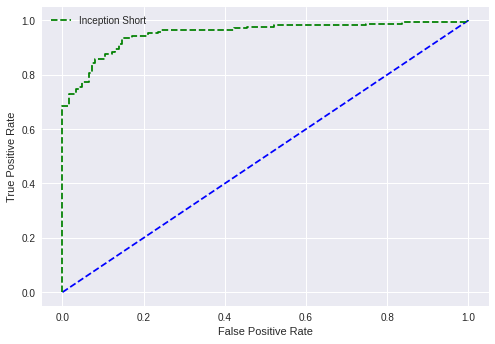

FOLD:  3
Inception Short: f1=0.913 auc=0.980


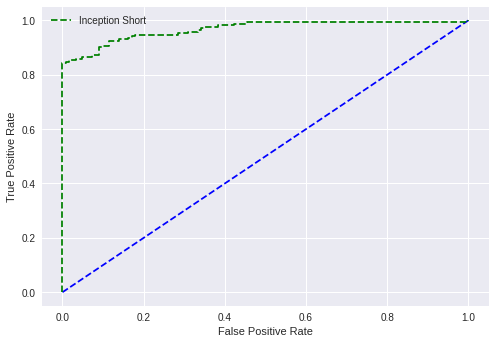

FOLD:  4
Inception Short: f1=0.869 auc=0.957


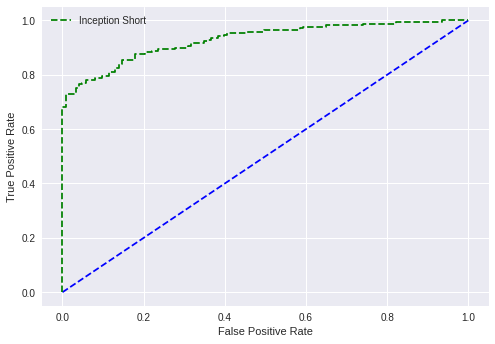

FOLD:  5
Inception Short: f1=0.880 auc=0.959


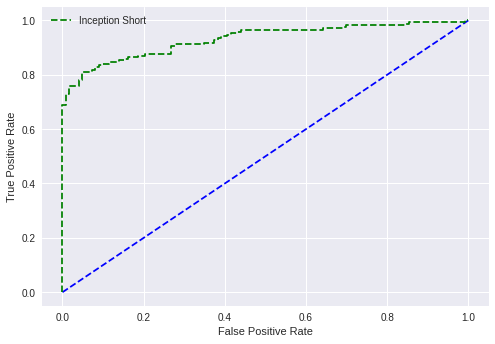




fold: 1 , test Precision: 0.896969696969697 %
fold: 2 , test Precision: 0.91875 %
fold: 3 , test Precision: 0.9329268292682927 %
fold: 4 , test Precision: 0.861271676300578 %
fold: 5 , test Precision: 0.9225806451612903 %



fold: 1 , test Recall: 0.8654970760233918 %
fold: 2 , test Recall: 0.8596491228070176 %
fold: 3 , test Recall: 0.8947368421052632 %
fold: 4 , test Recall: 0.8764705882352941 %
fold: 5 , test Recall: 0.8411764705882353 %



fold: 1 , Dice Score: 0.8809523809523809 %
fold: 2 , Dice Score: 0.8882175226586103 %
fold: 3 , Dice Score: 0.9134328358208955 %
fold: 4 , Dice Score: 0.8688046647230321 %
fold: 5 , Dice Score: 0.88 %
after  5  Cross validation test Precision  0.91% (+/- 0.03%)
after  5  Cross validation test Recall 0.87% (+/- 0.02%)
after  5  Cross validation Dice Score 0.89% (+/- 0.01%)


In [ ]:
CV(5)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import numpy

def CV(folds):

    patience = 20
    n_fold=folds
    C=1
    dice_scores = []

    while C < 6:

        if C > 3:
          patience = 10
        print('FOLD: ', C)

        num_classes = 2
        model=inceptionShort(input_shape=(300, 12), dropout=0.7)
        X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C))
        y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C))
        # X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))
        # joblib.load(X_input[train], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_train_'+str(C))

        X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
        y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
        # X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))
        # joblib.load(X_input[test], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_Test_'+str(C))
        y_test1=utils.to_categorical(y_test, num_classes)
        y_train=utils.to_categorical(y_train, num_classes)

        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[f1_m])
        # mc = ModelCheckpoint('/content/drive/MyDrive/Capstone_Work/CV Models1/RMSADAPCA'+str(C)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
        es = EarlyStopping(monitor='val_loss', mode='min', patience=patience)
        history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test,y_test1), class_weight={0:1, 1:2}, verbose=0, callbacks=[es])

        left_epochs = 200 - len(history.history['f1_m'])

        opt1 = optimizers.Adadelta()
        model.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=[f1_m])
        history1 = model.fit(X_train, y_train, epochs=left_epochs, batch_size=16, validation_data=(X_test,y_test1), verbose=0)

        plotting_epochs(history.history['f1_m'] + history1.history['f1_m'], history.history['val_f1_m'] + history1.history['val_f1_m'], 'F1_score')
        plt.show()

        predictions = model.predict(X_test)
        y_pred = np.argmax(predictions, axis = 1)

        dice_score = dice(y_pred, y_test, k = 1)
        dice_scores.append(dice_score)

        C+=1
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test dice score:",dice_scores[i],"%")

    print('\n\n')
    # print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    print("After ",n_fold," Cross validation test dice score  %.3f%% (+/- %.3f%%)" % (numpy.mean(dice_scores), numpy.std(dice_scores)))

FOLD:  1


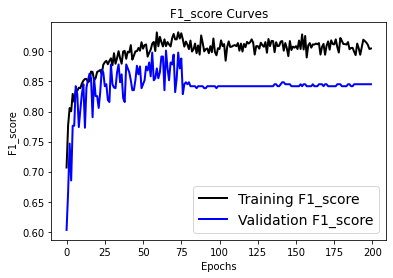

FOLD:  2


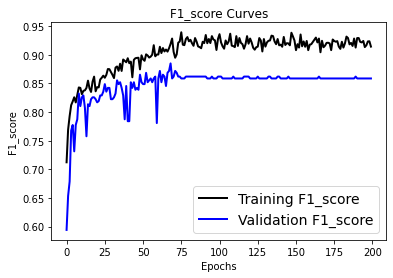

FOLD:  3


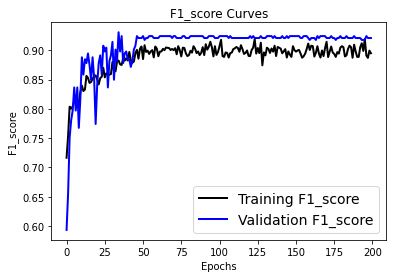

FOLD:  4


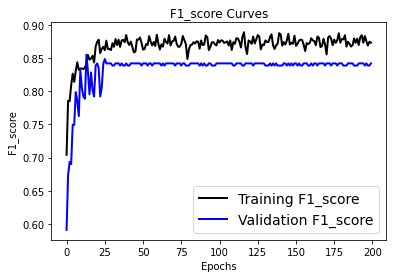

FOLD:  5


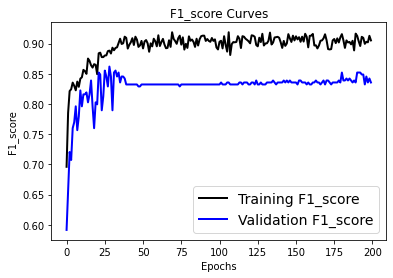




fold: 1 , test dice score: 0.8746666666666667 %
fold: 2 , test dice score: 0.8700906344410876 %
fold: 3 , test dice score: 0.9281437125748503 %
fold: 4 , test dice score: 0.852760736196319 %
fold: 5 , test dice score: 0.8563218390804598 %



After  5  Cross validation test dice score  0.876% (+/- 0.027%)


In [ ]:
CV(5)

## Inception short HRV + PCA rmsprop

FOLD:  1
Inception Naive: f1=0.893 auc=0.914


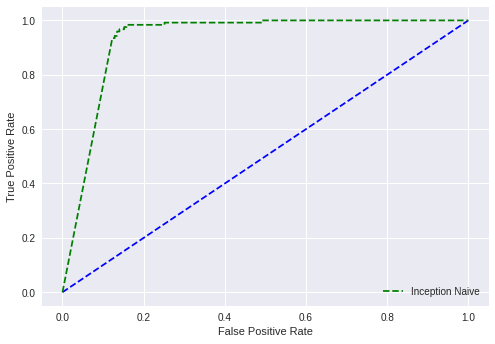

FOLD:  2
Inception Naive: f1=0.906 auc=0.926


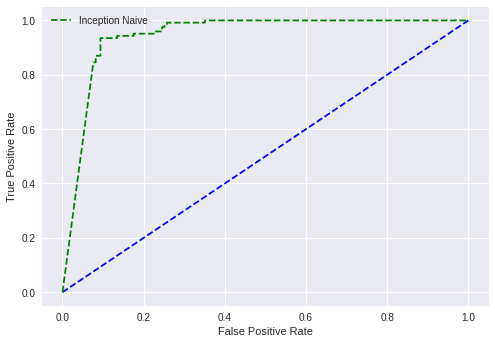

FOLD:  3
Inception Naive: f1=0.941 auc=0.977


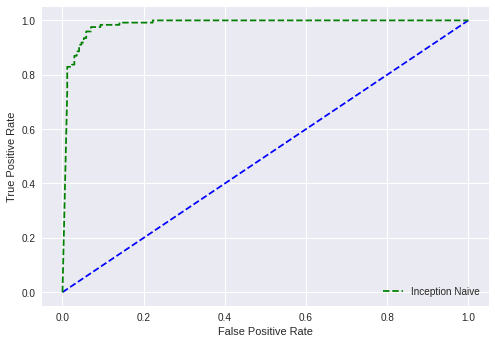

FOLD:  4
Inception Naive: f1=0.903 auc=0.924


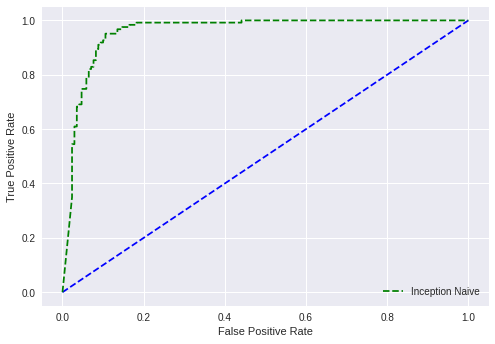

FOLD:  5
Inception Naive: f1=0.890 auc=0.918


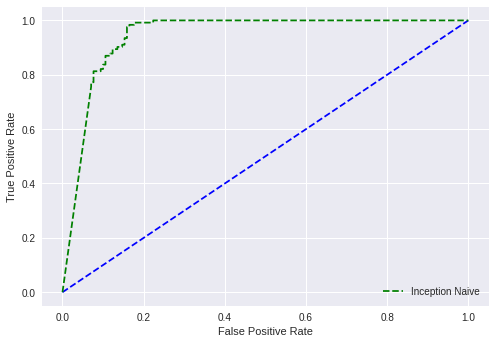




fold: 1 , test Precision: 0.8175675675675675 %
fold: 2 , test Precision: 0.8778625954198473 %
fold: 3 , test Precision: 0.9090909090909091 %
fold: 4 , test Precision: 0.8602941176470589 %
fold: 5 , test Precision: 0.8120805369127517 %



fold: 1 , test Recall: 0.983739837398374 %
fold: 2 , test Recall: 0.9349593495934959 %
fold: 3 , test Recall: 0.975609756097561 %
fold: 4 , test Recall: 0.9512195121951219 %
fold: 5 , test Recall: 0.983739837398374 %



fold: 1 , Dice Score: 0.8929889298892989 %
fold: 2 , Dice Score: 0.905511811023622 %
fold: 3 , Dice Score: 0.9411764705882353 %
fold: 4 , Dice Score: 0.9034749034749034 %
fold: 5 , Dice Score: 0.8897058823529411 %
after  5  Cross validation test Precision  0.86% (+/- 0.04%)
after  5  Cross validation test Recall 0.97% (+/- 0.02%)
after  5  Cross validation Dice Score 0.91% (+/- 0.02%)


In [ ]:
CV(5)

In [ ]:
num_classes = 2
model=inceptionShort_hrv(input_shape=(300, 12), dropout=0.7)
opt = optimizers.RMSprop(momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 300, 12)]    0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 300, 32)      416         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 300, 12)      0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 300, 32)      10272       conv1d_9[0][0]                   
____________________________________________________________________________________________

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import numpy

def CV(folds):

    patience = 20
    n_fold=folds
    C=1
    dice_scores = []

    while C < 6:

        if C > 3:
          patience = 10
        print('FOLD: ', C)

        num_classes = 2
        model=inceptionShort_hrv(input_shape=(300, 12), dropout=0.7)

        X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C))
        y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C))
        X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))
        # joblib.load(X_input[train], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_train_'+str(C))

        X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
        y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
        X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))
        # joblib.load(X_input[test], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_Test_'+str(C))

        y_test1=utils.to_categorical(y_test, num_classes)
        y_train=utils.to_categorical(y_train, num_classes)

        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[f1_m])
        # mc = ModelCheckpoint('/content/drive/MyDrive/Capstone_Work/CV Models1/RMSADAPCA'+str(C)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
        # es = EarlyStopping(monitor='val_loss', mode='min', patience=patience)
        history = model.fit((X_train, X_hrv_train), y_train, epochs=200, batch_size=16, validation_data=((X_test, X_hrv_test),y_test1), class_weight={0:1, 1:2}, verbose=0)

        plotting_epochs(history.history['f1_m'], history.history['val_f1_m'], 'F1_score')
        plt.show()

        predictions = model.predict((X_test, X_hrv_test))
        y_pred = np.argmax(predictions, axis = 1)

        dice_score = dice(y_pred, y_test, k = 1)
        dice_scores.append(dice_score)

        C+=1
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test dice score:",dice_scores[i],"%")

    print('\n\n')
    # print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    print("After ",n_fold," Cross validation test dice score  %.3f%% (+/- %.3f%%)" % (numpy.mean(dice_scores), numpy.std(dice_scores)))

FOLD:  1


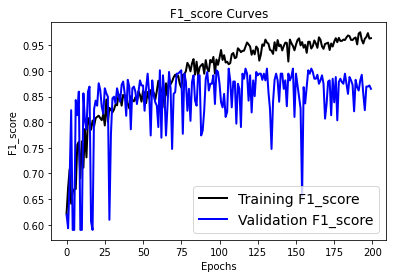

FOLD:  2


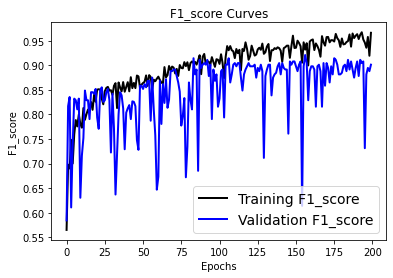

FOLD:  3


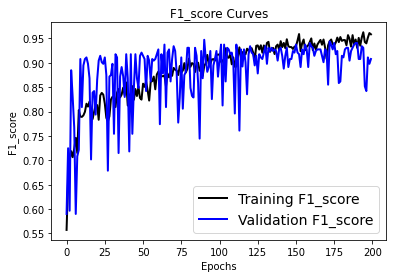

FOLD:  4


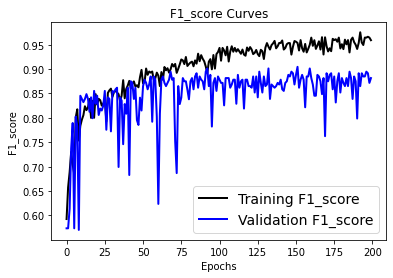

FOLD:  5


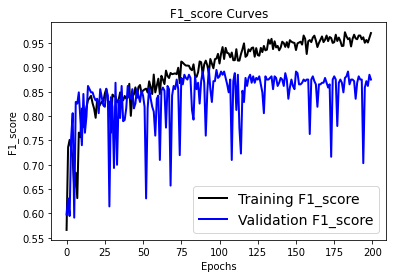




fold: 1 , test dice score: 0.8818443804034583 %
fold: 2 , test dice score: 0.9122807017543859 %
fold: 3 , test dice score: 0.9209039548022598 %
fold: 4 , test dice score: 0.8953488372093024 %
fold: 5 , test dice score: 0.8827160493827161 %



After  5  Cross validation test dice score  0.899% (+/- 0.016%)


In [ ]:
CV(5)

## Inception Naive rmsprop

In [ ]:
def naive_inception_module(layer_in, f1, f2, f3):

    conv1 = Conv1D(f1, 1, padding='same', activation='relu')(layer_in)

    conv3 = Conv1D(f2, 3, padding='same', activation='relu')(layer_in)
    conv3 = Conv1D(f2, 3, padding='same', activation='relu')(conv3)

    conv5 = Conv1D(f3, 5, padding='same', activation='relu')(layer_in)
    conv5 = Conv1D(f3, 5, padding='same', activation='relu')(conv5)

    pool = MaxPooling1D(3, strides=1, padding='same')(layer_in)

    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)

    layer_out = keras.layers.BatchNormalization()(layer_out)
    layer_out = keras.layers.Dropout(0.7)(layer_out)

    return layer_out

In [ ]:
visible = Input(shape=(300, 12))
layer = naive_inception_module(visible, 64, 128, 32)
layer = naive_inception_module(layer, 64, 128, 32)
layer = keras.layers.Flatten()(layer)
layer = keras.layers.Dense(num_classes, activation='softmax')(layer)
model = Model(inputs=visible, outputs=layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 12)]    0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 300, 128)     4736        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 300, 32)      1952        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 300, 64)      832         input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy

def CV(folds):

    n_fold=folds
    # kfold = StratifiedKFold(n_splits=n_fold, random_state=13)
    cvscores = []
    ap = 1
    C = 1
    cvcf1= []
    while C < 6:
        print('FOLD: ', C)

        num_classes = 2
        visible = Input(shape=(300, 12))
        layer = naive_inception_module(visible, 64, 128, 32)
        layer = naive_inception_module(layer, 64, 128, 32)
        layer = keras.layers.Flatten()(layer)
        layer = keras.layers.Dense(num_classes, activation='softmax')(layer)
        model = Model(inputs=visible, outputs=layer)

        X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C))
        y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C))
        # X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))
        # joblib.load(X_input[train], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_train_'+str(C))

        X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
        y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
        # X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))
        # joblib.load(X_input[test], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_Test_'+str(C))

        y_test1=utils.to_categorical(y_test, num_classes)
        y_train1=utils.to_categorical(y_train, num_classes)

        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[f1_m])
        # mc = ModelCheckpoint('temp_model'+str(C-1)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
        # history_train = []
        # history_test = []
        # for epoch in range(200):
        history = model.fit(X_train, y_train1, epochs=200, batch_size=16, validation_data=(X_test,y_test1), class_weight={0:1, 1:2}, verbose=0)
          # predictions = model.predict(X_test)
          # y_pred = np.argmax(predictions, axis = 1)
          # history_test.append(f1_score(y_test, y_pred))
          # predictions = model.predict(X_train)
          # y_pred = np.argmax(predictions, axis = 1)
          # history_train.append(f1_score(y_train, y_pred))
          # if epoch%10 == 0:
          #   print(epoch)
        # model1 = load_model('temp_model'+str(C-1)+'.h5')

        # scores = model.evaluate(X_test, y_test1, verbose=0)
        # print("test accuracy:   %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        # print("test F1 score: ",f1_score( y_test,np.argmax(model.predict(X_test), axis = 1))*100)
        # plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
        # plotting_epochs(history.history['loss'], history.history['val_loss'], 'LOSS')
        plotting_epochs(history.history['f1_m'], history.history['val_f1_m'], 'F1_score')
        # plotting_epochs(history.history['precision_m'], history.history['val_precision_m'], 'Precision')
        # plotting_epochs(history_train, history_test, 'F1-score')
        plt.show()
        # predictions = model.predict(X_test)
        # y_pred = np.argmax(predictions, axis = 1)

        # heatMap(y_test, y_pred, (6,6))
        # cvcf1.append(f1_score( y_test,np.argmax(model.predict(X_test), axis = 1))*100)
        # cvscores.append(scores[1] * 100)
        # predictions = model.predict(X[test])
        # y_pred = np.argmax(predictions, axis = 1)
        # heatMap(y[test], y_pred, (6,6))
        # ap += 1
        C+=1
    #     print("Last auc curve:", ap)
    # print('\n\n')
    # for i in range(0, n_fold):
    #     print('fold:',i+1,", test acc:",cvscores[i],"%")
    # print('\n\n')
    # for i in range(0, n_fold):
    #     print('fold:',i+1,", test f1 score:",cvcf1[i],"%")

    # print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    # print("after ",n_fold," Cross validation test f1 score  %.2f%% (+/- %.2f%%)" % (numpy.mean(cvcf1), numpy.std(cvcf1)))

FOLD:  1
Inception Naive: f1=0.962 auc=0.972


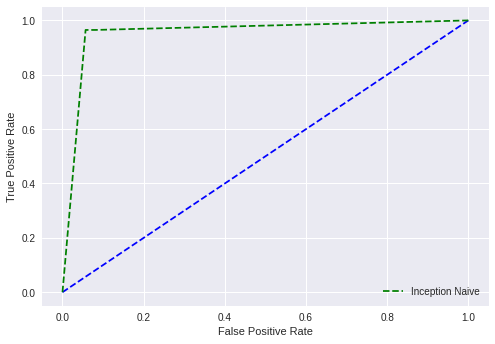

FOLD:  2
Inception Naive: f1=0.944 auc=0.961


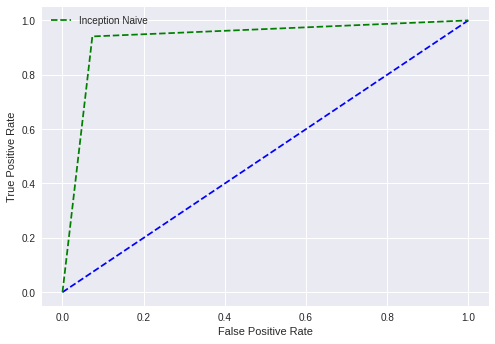

FOLD:  3
Inception Naive: f1=0.977 auc=0.982


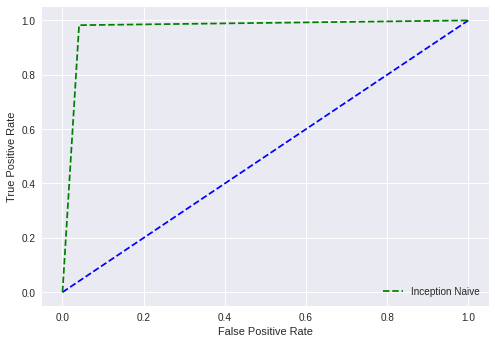

FOLD:  4
Inception Naive: f1=0.974 auc=0.984


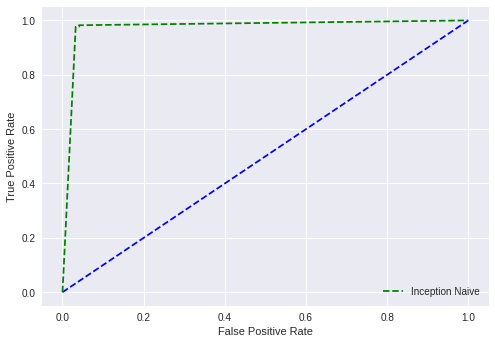

FOLD:  5
Inception Naive: f1=0.944 auc=0.978


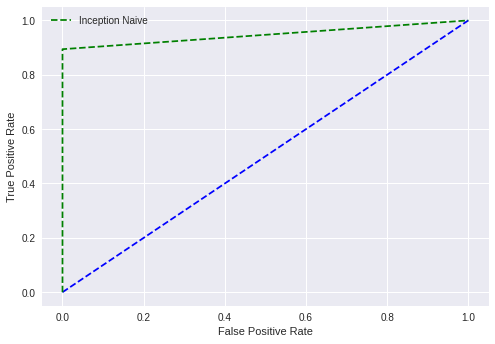




fold: 1 , test Precision: 0.9593023255813954 %
fold: 2 , test Precision: 0.9470588235294117 %
fold: 3 , test Precision: 0.9710982658959537 %
fold: 4 , test Precision: 0.9707602339181286 %
fold: 5 , test Precision: 1.0 %



fold: 1 , test Recall: 0.9649122807017544 %
fold: 2 , test Recall: 0.9415204678362573 %
fold: 3 , test Recall: 0.9824561403508771 %
fold: 4 , test Recall: 0.9764705882352941 %
fold: 5 , test Recall: 0.8941176470588236 %



fold: 1 , Dice Score: 0.9620991253644315 %
fold: 2 , Dice Score: 0.9442815249266863 %
fold: 3 , Dice Score: 0.9767441860465116 %
fold: 4 , Dice Score: 0.9736070381231672 %
fold: 5 , Dice Score: 0.9440993788819876 %
after  5  Cross validation test Precision  0.97% (+/- 0.02%)
after  5  Cross validation test Recall 0.95% (+/- 0.03%)
after  5  Cross validation Dice Score 0.96% (+/- 0.01%)


In [ ]:
CV(5)

FOLD:  1


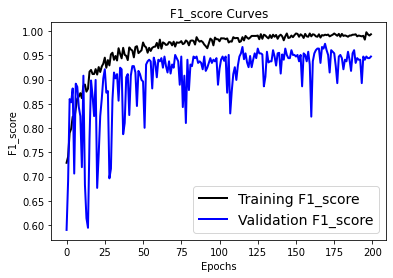

FOLD:  2


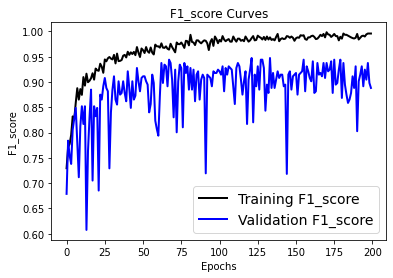

FOLD:  3


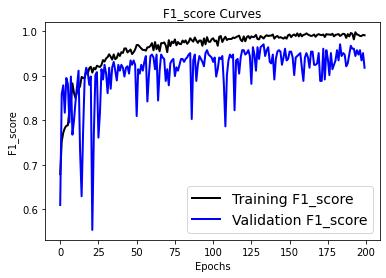

FOLD:  4


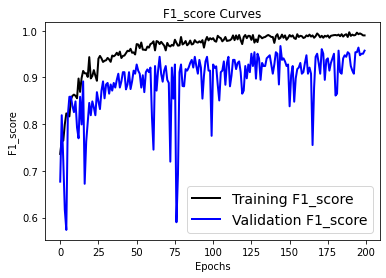

FOLD:  5


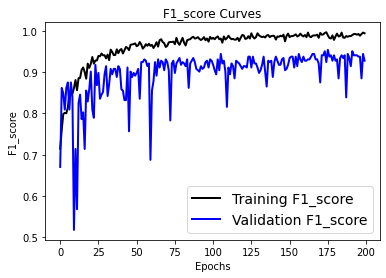

In [ ]:
CV(5)

## Inception Naive rmsprop + HRV

FOLD:  1
Inception Naive: f1=0.950 auc=0.969


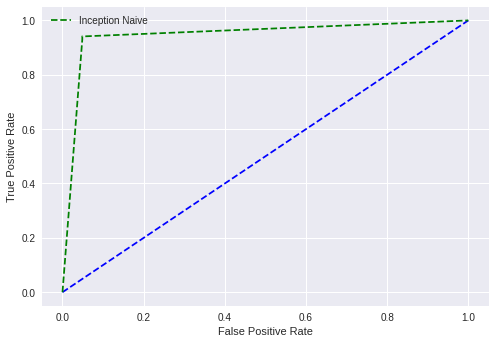

FOLD:  2
Inception Naive: f1=0.964 auc=0.981


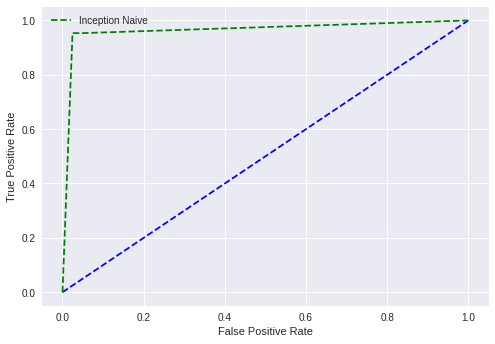

FOLD:  3
Inception Naive: f1=0.976 auc=0.988


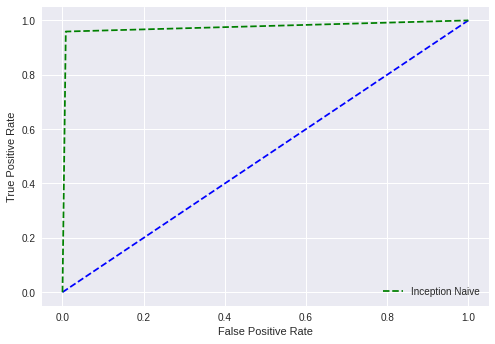

FOLD:  4
Inception Naive: f1=0.971 auc=0.978


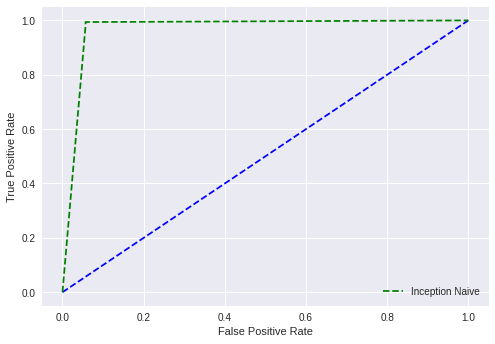

FOLD:  5
Inception Naive: f1=0.955 auc=0.975


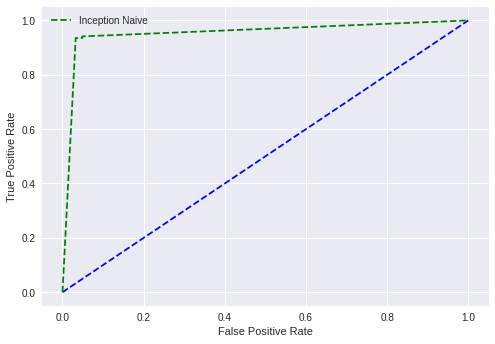




fold: 1 , test Precision: 0.963855421686747 %
fold: 2 , test Precision: 0.9818181818181818 %
fold: 3 , test Precision: 0.9939393939393939 %
fold: 4 , test Precision: 0.9597701149425287 %
fold: 5 , test Precision: 0.9754601226993865 %



fold: 1 , test Recall: 0.935672514619883 %
fold: 2 , test Recall: 0.9473684210526315 %
fold: 3 , test Recall: 0.9590643274853801 %
fold: 4 , test Recall: 0.9823529411764705 %
fold: 5 , test Recall: 0.9352941176470588 %



fold: 1 , Dice Score: 0.9495548961424333 %
fold: 2 , Dice Score: 0.9642857142857143 %
fold: 3 , Dice Score: 0.9761904761904762 %
fold: 4 , Dice Score: 0.9709302325581395 %
fold: 5 , Dice Score: 0.954954954954955 %
after  5  Cross validation test Precision  0.97% (+/- 0.01%)
after  5  Cross validation test Recall 0.95% (+/- 0.02%)
after  5  Cross validation Dice Score 0.96% (+/- 0.01%)


In [ ]:
CV(5)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy

def CV(folds):

    n_fold=folds
    # kfold = StratifiedKFold(n_splits=n_fold, random_state=13)
    cvscores = []
    ap = 1
    C = 1
    cvcf1= []
    while C < 6:
        print('FOLD: ', C)

        num_classes = 2
        visible = Input(shape=(300, 12))
        input_layer1 = keras.layers.Input((31))

        layer = naive_inception_module(visible, 64, 128, 32)
        layer = naive_inception_module(layer, 64, 128, 32)
        layer = keras.layers.Flatten()(layer)
        layer = concatenate([layer, input_layer1], axis=1)

        # Z1 = keras.layers.Dense(1024, activation='relu')(layer)
        # Z1 = keras.layers.Dense(64, activation='relu')(Z1)

        layer = keras.layers.Dense(num_classes, activation='softmax')(layer)

        model = Model(inputs=[visible, input_layer1], outputs=layer)

        X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C))
        y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C))
        X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))
        # joblib.load(X_input[train], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_train_'+str(C))

        X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
        y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
        X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))
        # joblib.load(X_input[test], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_Test_'+str(C))

        y_test1=utils.to_categorical(y_test, num_classes)
        y_train1=utils.to_categorical(y_train, num_classes)

        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[f1_m])
        # mc = ModelCheckpoint('temp_model'+str(C-1)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
        # history_train = []
        # history_test = []
        # for epoch in range(200):
        history = model.fit((X_train, X_hrv_train), y_train1, epochs=200, batch_size=16, validation_data=((X_test, X_hrv_test), y_test1), class_weight={0:1, 1:2}, verbose=0)
          # predictions = model.predict(X_test)
          # y_pred = np.argmax(predictions, axis = 1)
          # history_test.append(f1_score(y_test, y_pred))
          # predictions = model.predict(X_train)
          # y_pred = np.argmax(predictions, axis = 1)
          # history_train.append(f1_score(y_train, y_pred))
          # if epoch%10 == 0:
          #   print(epoch)
        # model1 = load_model('temp_model'+str(C-1)+'.h5')

        # scores = model.evaluate(X_test, y_test1, verbose=0)
        # print("test accuracy:   %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        # print("test F1 score: ",f1_score( y_test,np.argmax(model.predict(X_test), axis = 1))*100)
        # plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
        # plotting_epochs(history.history['loss'], history.history['val_loss'], 'LOSS')
        plotting_epochs(history.history['f1_m'], history.history['val_f1_m'], 'F1_score')
        # plotting_epochs(history.history['precision_m'], history.history['val_precision_m'], 'Precision')
        # plotting_epochs(history_train, history_test, 'F1-score')
        plt.show()
        # predictions = model.predict(X_test)
        # y_pred = np.argmax(predictions, axis = 1)

        # heatMap(y_test, y_pred, (6,6))
        # cvcf1.append(f1_score( y_test,np.argmax(model.predict(X_test), axis = 1))*100)
        # cvscores.append(scores[1] * 100)
        # predictions = model.predict(X[test])
        # y_pred = np.argmax(predictions, axis = 1)
        # heatMap(y[test], y_pred, (6,6))
        # ap += 1
        C+=1
    #     print("Last auc curve:", ap)
    # print('\n\n')
    # for i in range(0, n_fold):
    #     print('fold:',i+1,", test acc:",cvscores[i],"%")
    # print('\n\n')
    # for i in range(0, n_fold):
    #     print('fold:',i+1,", test f1 score:",cvcf1[i],"%")

    # print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    # print("after ",n_fold," Cross validation test f1 score  %.2f%% (+/- %.2f%%)" % (numpy.mean(cvcf1), numpy.std(cvcf1)))

FOLD:  1


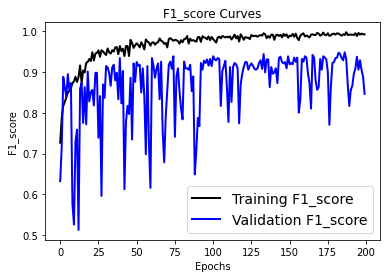

FOLD:  2


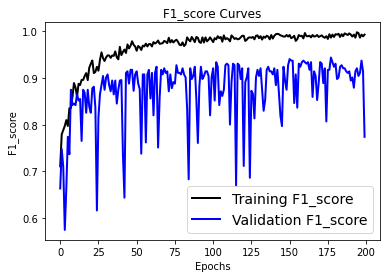

FOLD:  3


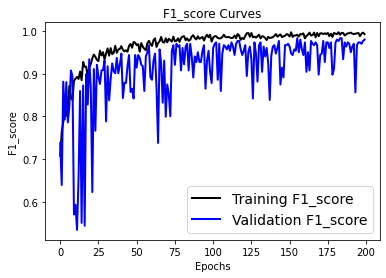

FOLD:  4


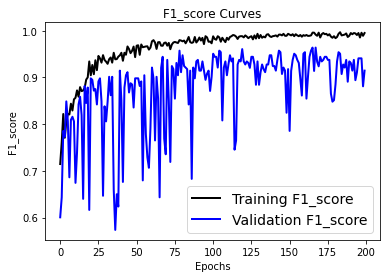

FOLD:  5


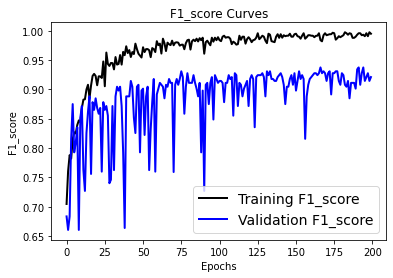

In [ ]:
CV(5)

## MobileNet

In [ ]:
CV(5)

FOLD:  1


ValueError: ignored

# SHAP

In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 6.7 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491640 sha256=8f19cd36e0c0ab7c82973ec3dfc94cb8cb86505ac70ee9bd4b4bbfb5cf064eb2
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
columns = np.array(hrv_data.columns)[1:-1]
columns

array(['cvnni', 'cvsd', 'max_hr', 'mean_hr', 'mean_nni', 'median_nni',
       'min_hr', 'nni_20', 'nni_50', 'pnni_20', 'pnni_50', 'range_nni',
       'rmssd', 'sdnn', 'sdsd', 'std_hr', 'Age ',
       'Years of practice (total)',
       'Years of practice (at present workplace)',
       'Marital status/ years of marriage', 'Family type', 'Siblings',
       'Duty hours per week', 'Front line covid worker',
       'Second Line Covid worker', ' Non covid worker',
       'To what extent COVID-19 has impacted your mental wellbeing',
       'Gender (optional)', 'DM', 'Hypertension ', 'Smoking'],
      dtype=object)

In [ ]:
X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_1')
y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_1')
X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_1')

X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_1')
y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_1')
X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_1')

model1 = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAHRV1.h5')
model2 = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/Try_PCAModel0.h5')

In [ ]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
# e = shap.DeepExplainer(model2, X_train)

In [ ]:
e = shap.GradientExplainer(model1, [X_train, X_hrv_train])

In [ ]:
shap_values = e.shap_values([X_test, X_hrv_test]) # (2, 2)

In [ ]:
type(shap_values)

list

In [ ]:
shap_values[1][0].shape

(294, 300, 12)

In [ ]:
a = np.array([0, 3, 7, 1, 4])
print(np.argsort(a))

[0 3 1 4 2]


In [ ]:
def find_top40_indexes(shap_values, index, lead):
  values = [ -x for x in shap_values[1][0][index, :, lead] if x < 0]
  values = np.array(values)
  return np.argsort(values)[:40]

In [ ]:
find_top40_indexes(shap_values, 0, 1)

array([ 36, 104,  28,  69, 110,  59,  29, 111, 121,   9,  91,  72,  86,
        58,  92,  85,  30,  71,  88,  25, 115,  93, 102,  17,  56,  65,
        35,  27,  80, 122,  99,  82,   6,  20,   8,  33,  42, 103, 100,
        43])

In [ ]:
def plot_shap_pca(X_test, index, shap_values):
  k=0
  while k < 12:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    indexes = find_top40_indexes(shap_values, index, k)
    plt.plot(X_test[index, :, k])
    for i in range(len(indexes)):
      plt.scatter(indexes[i], X_test[index, indexes[i], k], c='red')
    plt.subplot(1, 2, 2)
    indexes = find_top40_indexes(shap_values, index, k+1)
    for i in range(len(indexes)):
      plt.scatter(indexes[i], X_test[index, indexes[i], k+1], c='red')
    plt.plot(X_test[index, :, k+1])
    k+=2
    plt.show()

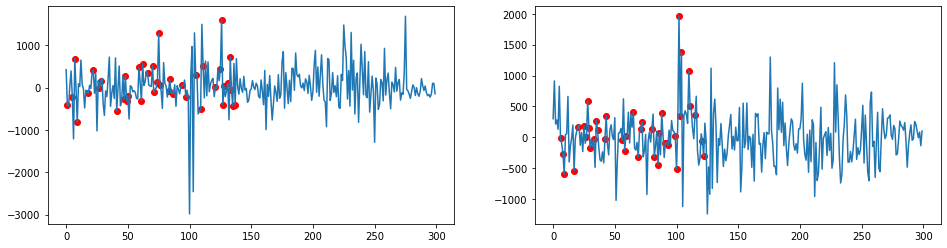

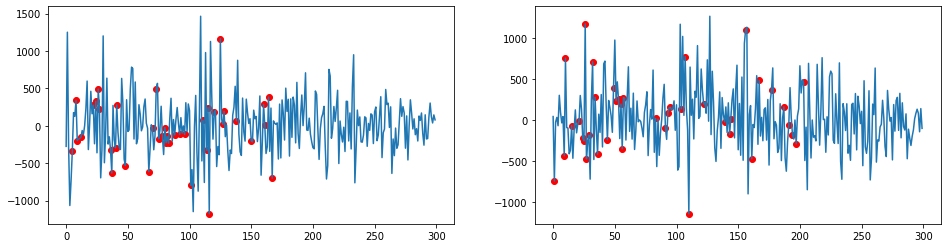

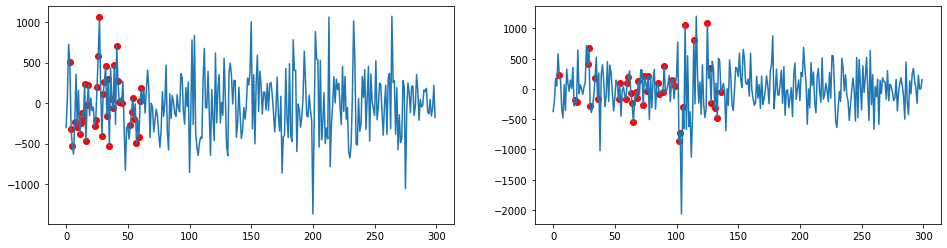

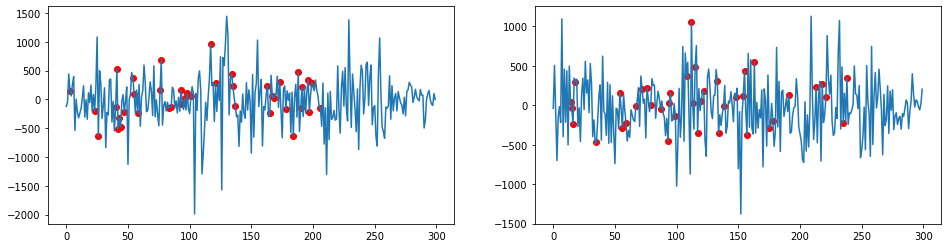

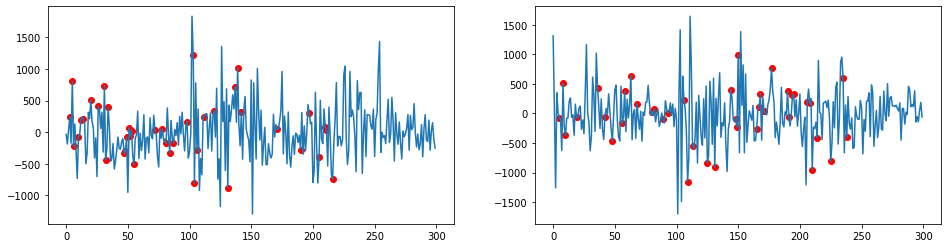

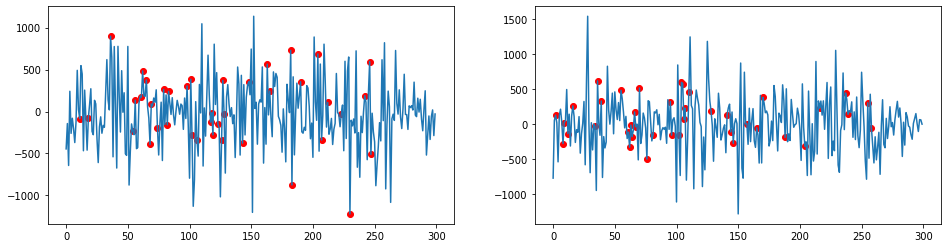

In [ ]:
plot_shap_pca(X_test, 0, shap_values)

In [ ]:
def ABS_SHAP(df_shap, df, file_name):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    print(k2)
    k2.to_csv('/content/drive/MyDrive/Capstone_Work/'+file_name)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,15),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

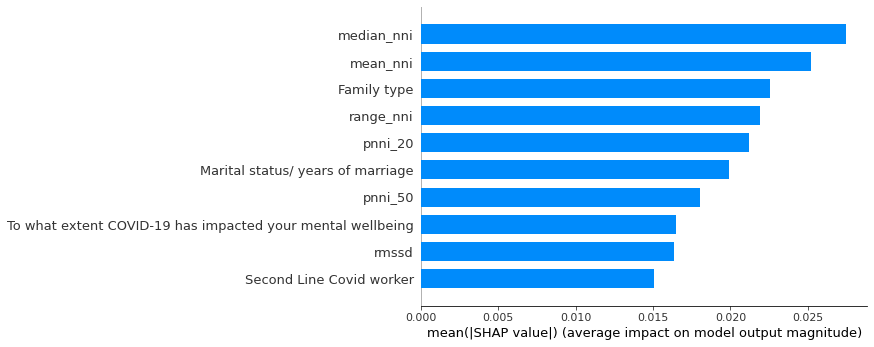

In [ ]:
testing = pd.DataFrame(X_hrv_test, columns=columns)
shap.summary_plot(shap_values[0][1], testing, plot_type="bar", max_display=10)

                                             Variable  SHAP_abs      Corr  Sign
30                                            Smoking  0.000071  0.945783   red
0                                               cvnni  0.000086 -0.937902  blue
1                                                cvsd  0.000117 -0.938724  blue
2                                              max_hr  0.000173  0.937819   red
23                            Front line covid worker  0.000283  0.934093   red
18           Years of practice (at present workplace)  0.001697  0.936613   red
16                                               Age   0.002462  0.933262   red
15                                             std_hr  0.002815  0.931570   red
8                                              nni_50  0.003393 -0.934509  blue
7                                              nni_20  0.003710 -0.942306  blue
6                                              min_hr  0.003792 -0.949542  blue
28                                      

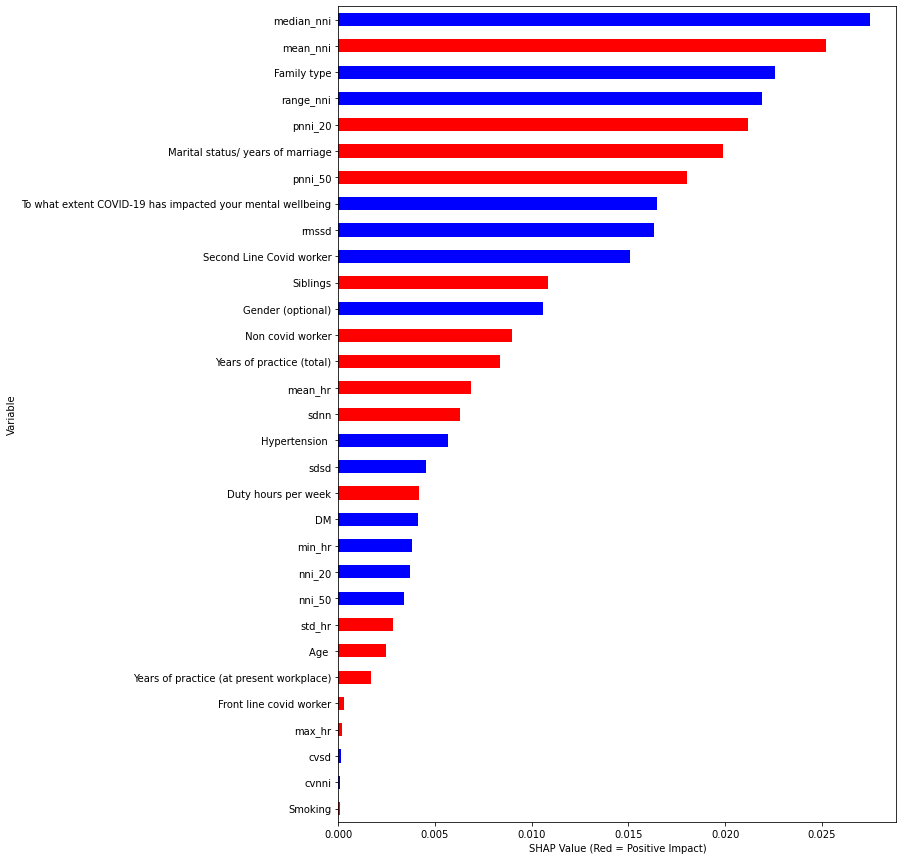

In [ ]:
ABS_SHAP(shap_values[1][1], testing)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import numpy

def CV_Shap(folds=5):

    patience = 20
    n_fold=folds
    C=1
    dice_scores = []

    while C < 6:
        print('FOLD: ', C)

        X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C))
        y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C))
        X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))
        # joblib.load(X_input[train], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_train_'+str(C))

        X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
        y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
        X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))
        # joblib.load(X_input[test], '/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_ECG_Test_'+str(C))

        y_test1=utils.to_categorical(y_test, num_classes)
        y_train=utils.to_categorical(y_train, num_classes)

        model = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAHRVInception_Naive_revise'+str(C-1)+'.h5')

        e = shap.GradientExplainer(model, [X_train, X_hrv_train])
        shap_values = e.shap_values([X_test, X_hrv_test])


        plot_shap_pca(X_test, 0, shap_values)

        testing = pd.DataFrame(X_hrv_test, columns=columns)
        shap.summary_plot(shap_values[0][1], testing, plot_type="bar", max_display=10)
        ABS_SHAP(shap_values[1][1], testing, 'Inception_Naive_HRV_Shap_'+str(C)+'.csv')
        plt.show()

        C+=1

## Inception Short

FOLD:  1


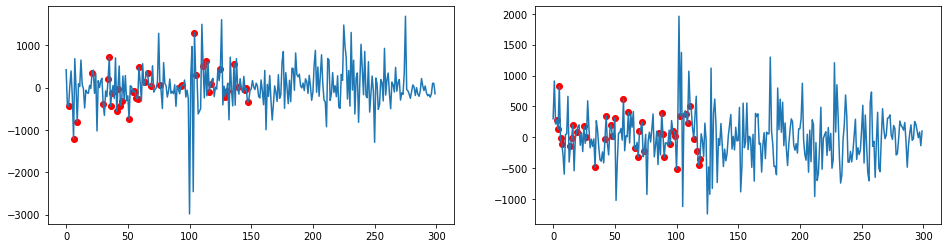

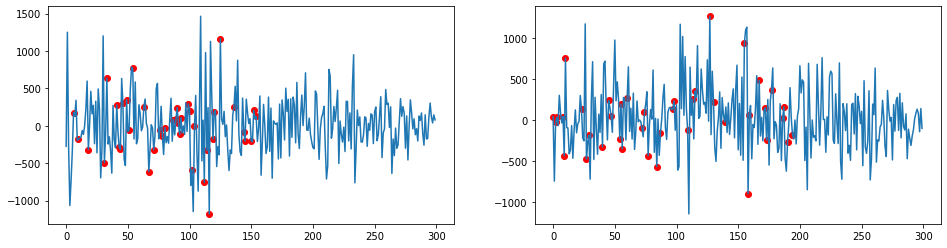

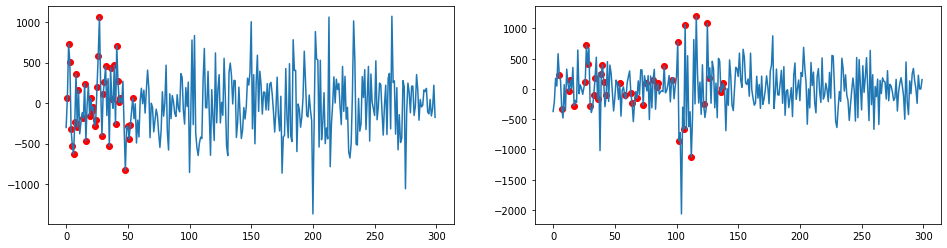

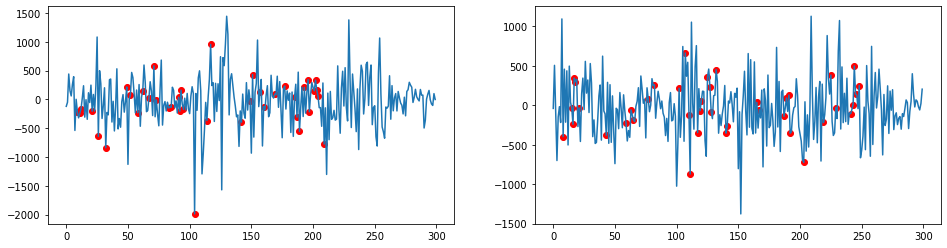

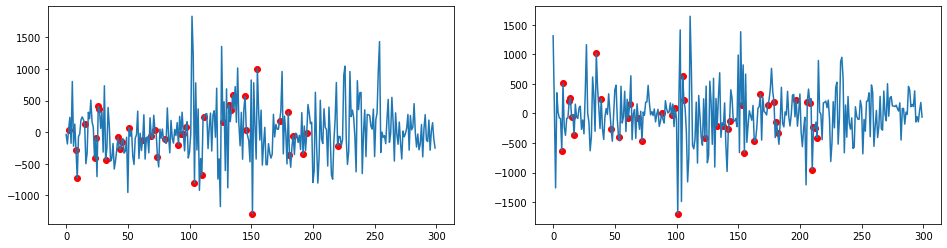

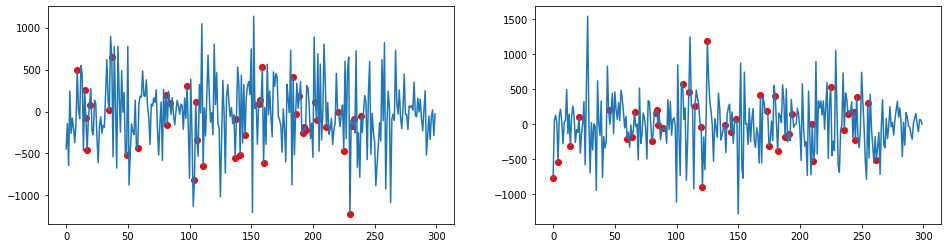

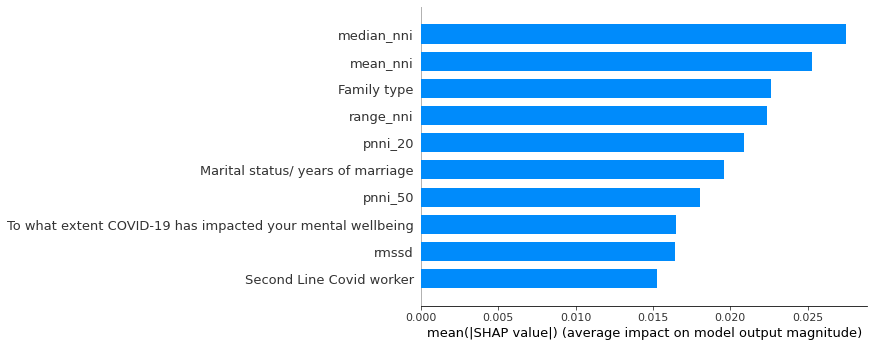

                                             Variable  SHAP_abs      Corr  Sign
30                                            Smoking  0.000072  0.952593   red
0                                               cvnni  0.000087 -0.936437  blue
1                                                cvsd  0.000119 -0.939428  blue
2                                              max_hr  0.000174  0.930424   red
23                            Front line covid worker  0.000282  0.935885   red
18           Years of practice (at present workplace)  0.001679  0.939348   red
16                                               Age   0.002421  0.932601   red
15                                             std_hr  0.002827  0.931983   red
8                                              nni_50  0.003393 -0.937998  blue
7                                              nni_20  0.003677 -0.942759  blue
6                                              min_hr  0.003801 -0.945351  blue
22                                Duty h

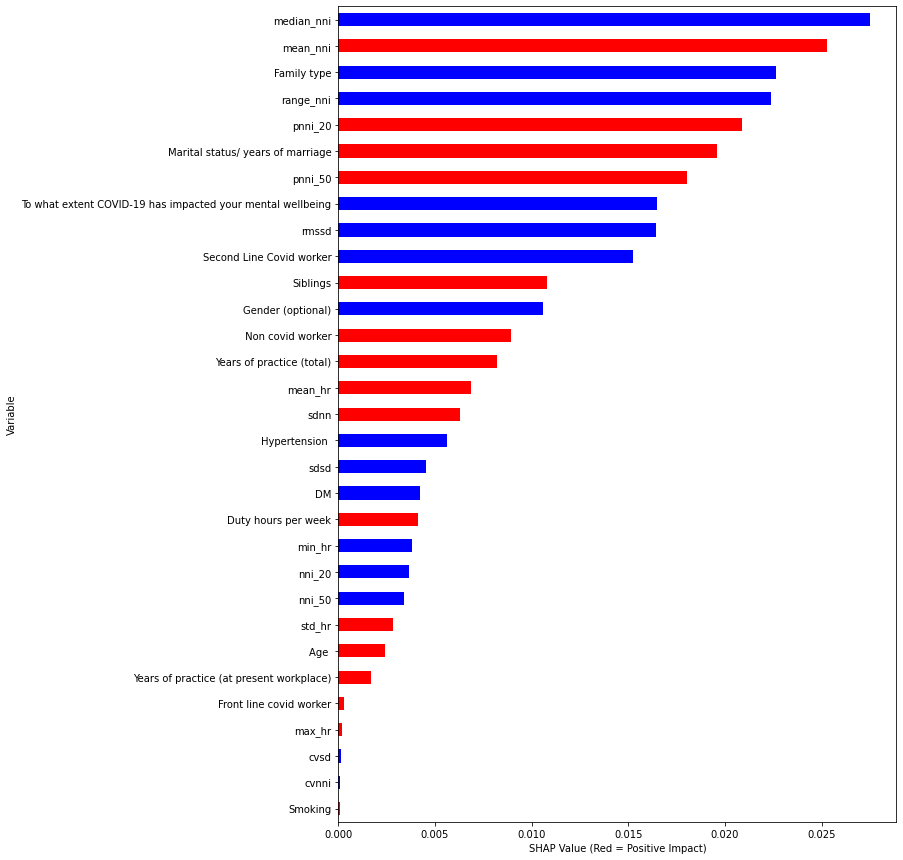

FOLD:  2


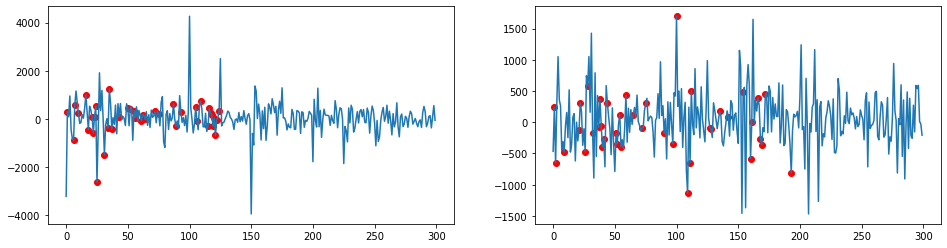

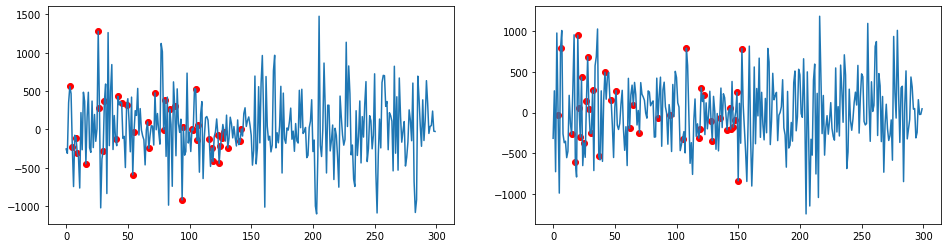

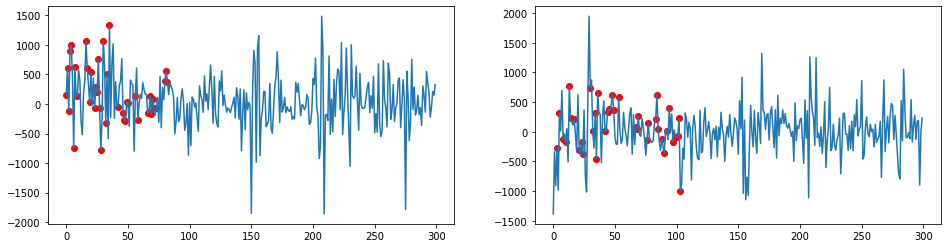

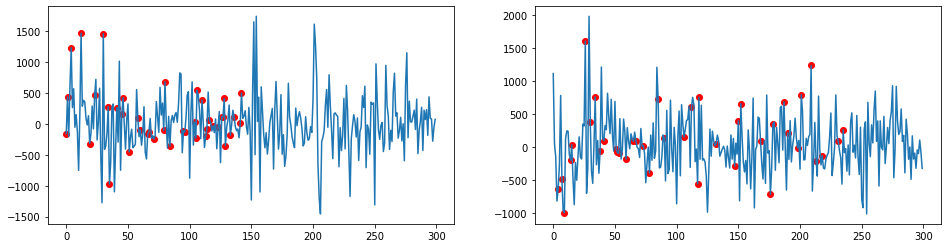

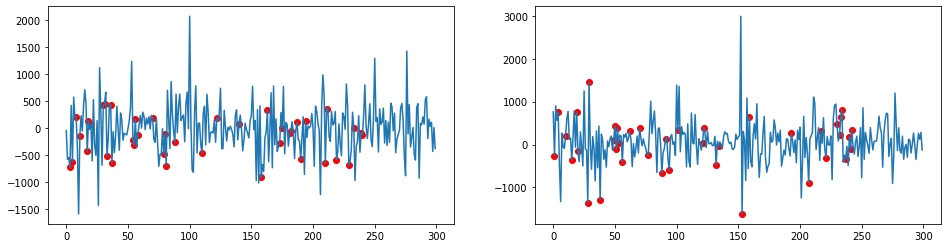

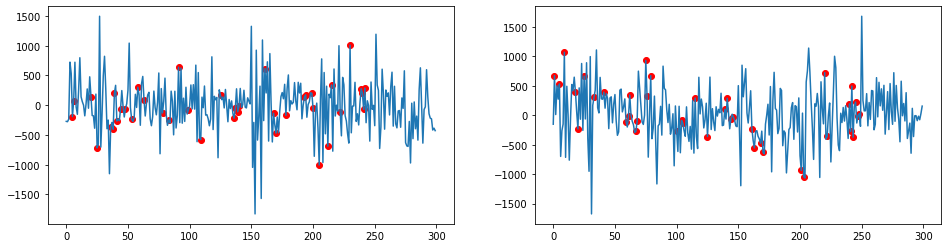

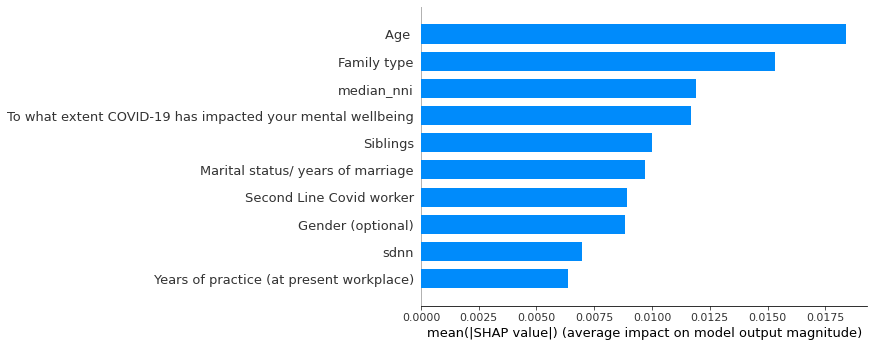

                                             Variable  SHAP_abs      Corr  Sign
1                                                cvsd  0.000014 -0.896422  blue
0                                               cvnni  0.000024 -0.916689  blue
17                          Years of practice (total)  0.000043  0.871118   red
8                                              nni_50  0.000044  0.892223   red
3                                             mean_hr  0.000482  0.865129   red
7                                              nni_20  0.000573  0.883886   red
30                                            Smoking  0.000914 -0.887196  blue
4                                            mean_nni  0.001091  0.864760   red
15                                             std_hr  0.001579  0.914010   red
2                                              max_hr  0.001685  0.876663   red
12                                              rmssd  0.001788  0.891354   red
14                                      

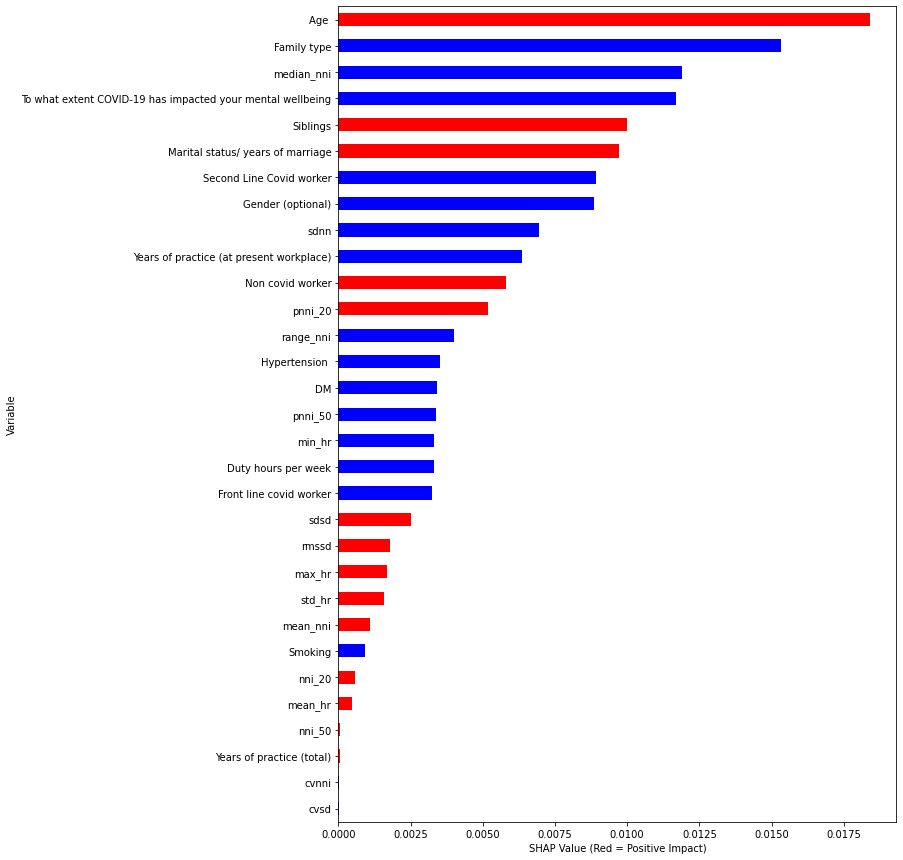

FOLD:  3


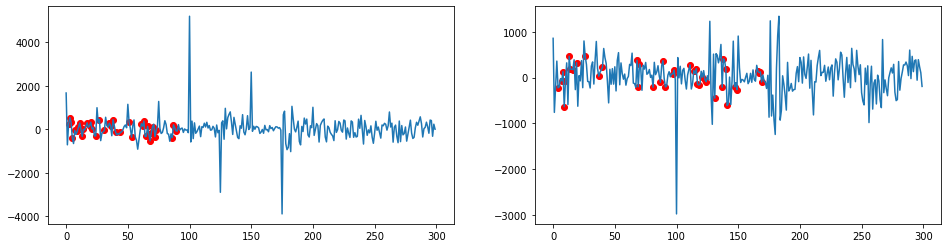

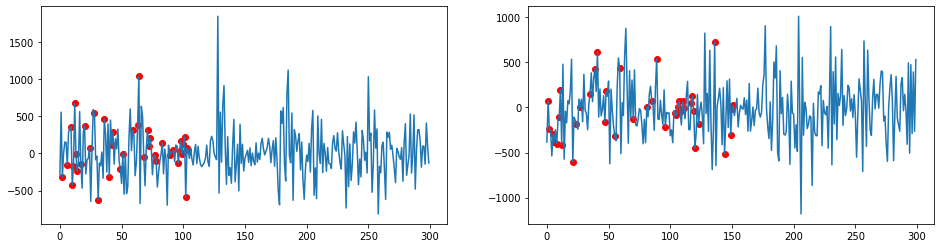

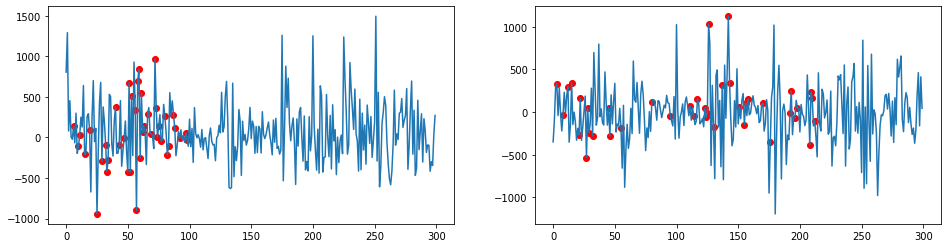

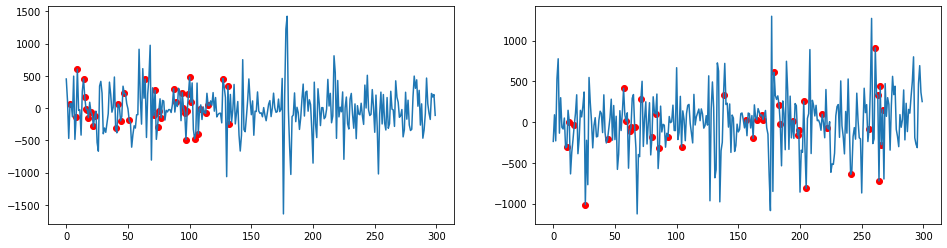

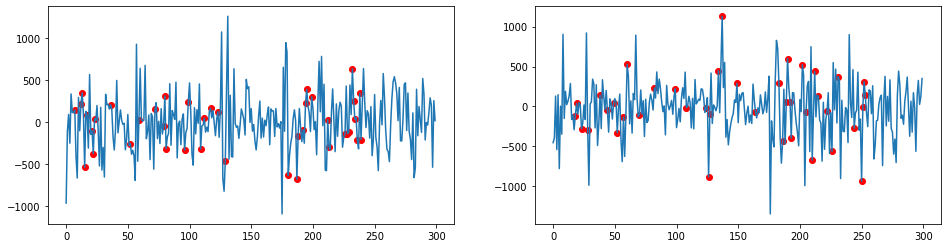

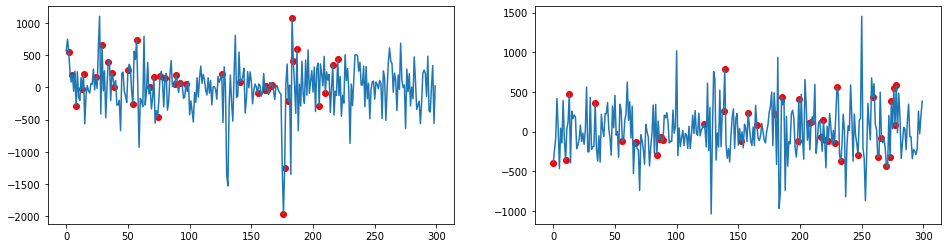

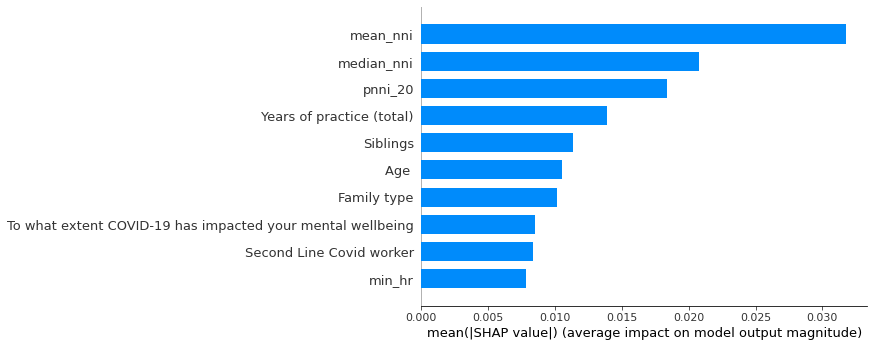

                                             Variable  SHAP_abs      Corr  Sign
0                                               cvnni  0.000013 -0.840405  blue
22                                Duty hours per week  0.000020 -0.868414  blue
1                                                cvsd  0.000035 -0.844777  blue
30                                            Smoking  0.000763 -0.867705  blue
13                                               sdnn  0.000829  0.841521   red
2                                              max_hr  0.001502 -0.872567  blue
14                                               sdsd  0.001503  0.847595   red
23                            Front line covid worker  0.001511 -0.872461  blue
8                                              nni_50  0.001690 -0.852918  blue
7                                              nni_20  0.002111 -0.854072  blue
28                                                 DM  0.002154 -0.835140  blue
15                                      

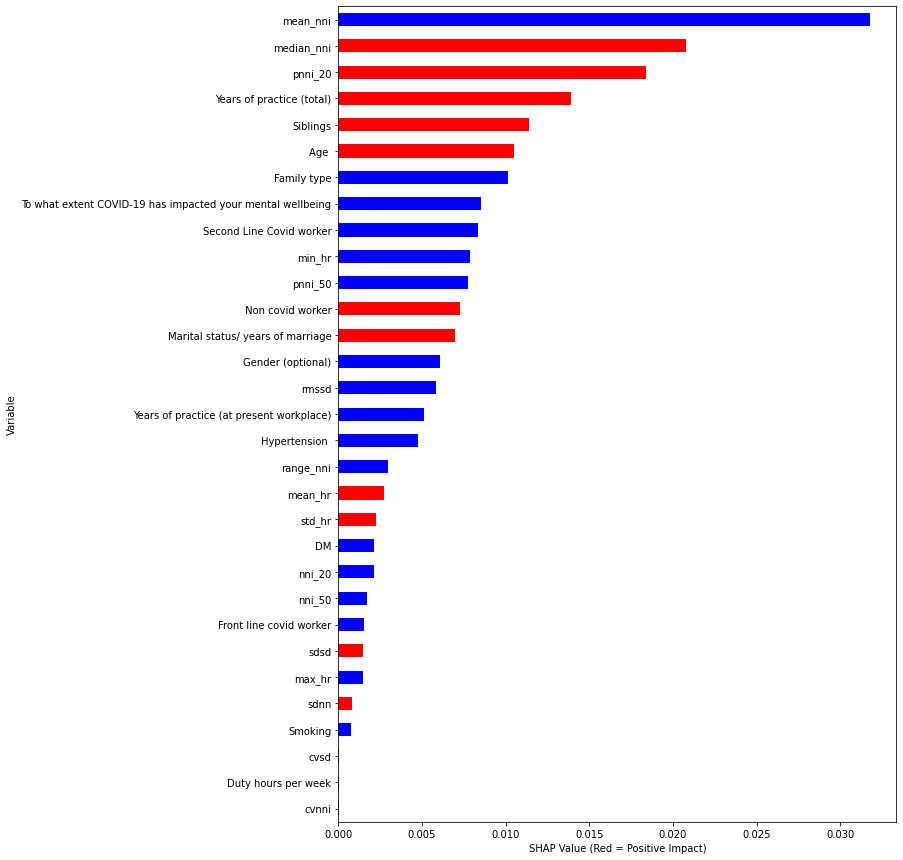

FOLD:  4


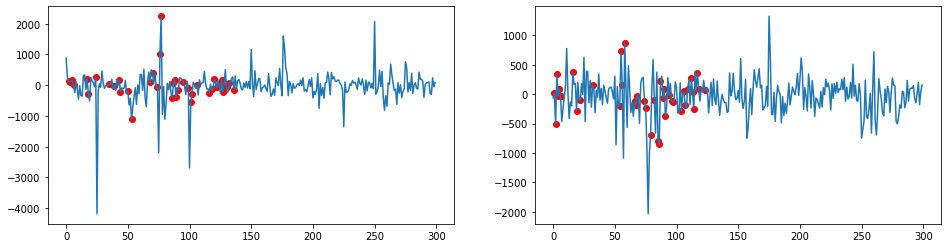

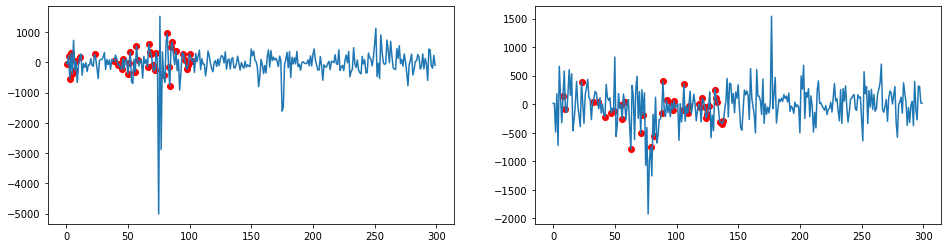

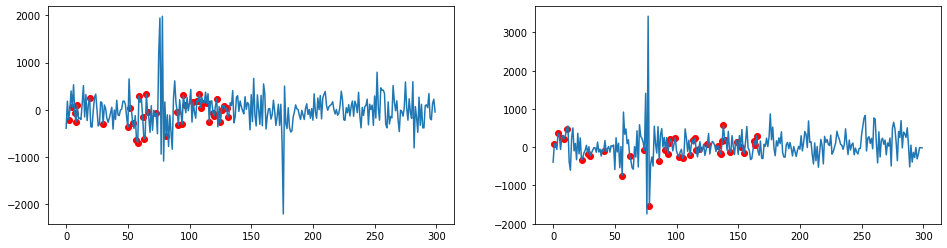

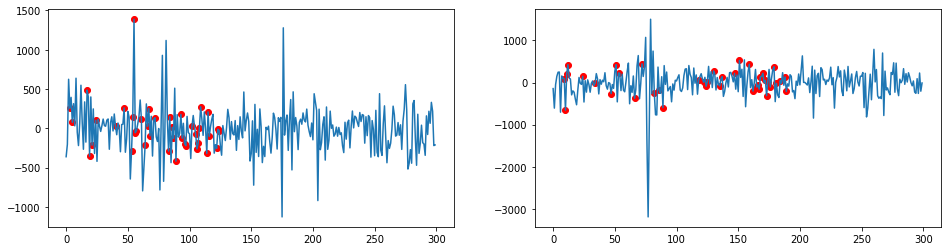

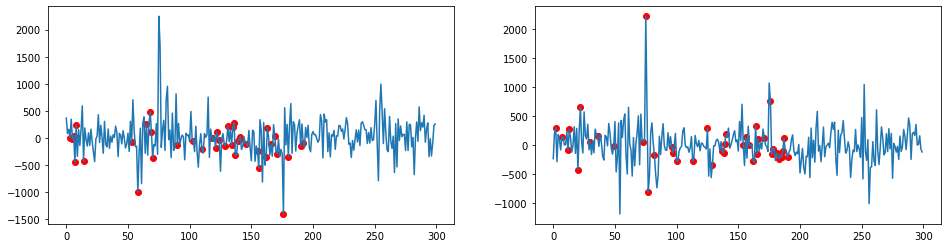

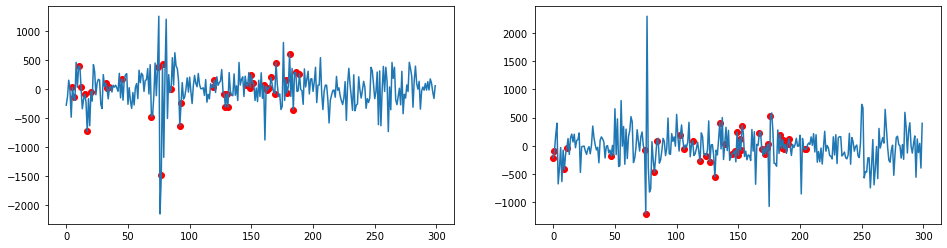

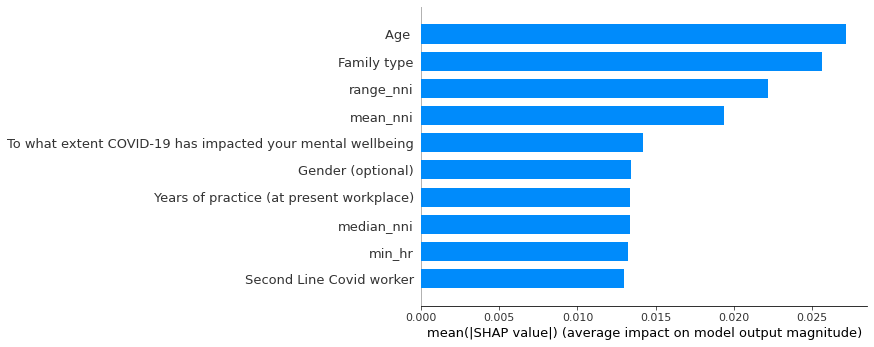

                                             Variable  SHAP_abs      Corr  Sign
1                                                cvsd  0.000008 -0.848435  blue
0                                               cvnni  0.000012  0.855899   red
8                                              nni_50  0.000562 -0.867684  blue
7                                              nni_20  0.000857  0.856953   red
30                                            Smoking  0.001449 -0.855202  blue
22                                Duty hours per week  0.002298 -0.874507  blue
25                                   Non covid worker  0.002598 -0.866398  blue
17                          Years of practice (total)  0.002680  0.863937   red
15                                             std_hr  0.003763  0.866353   red
19                  Marital status/ years of marriage  0.004276  0.864124   red
23                            Front line covid worker  0.004342 -0.866976  blue
2                                       

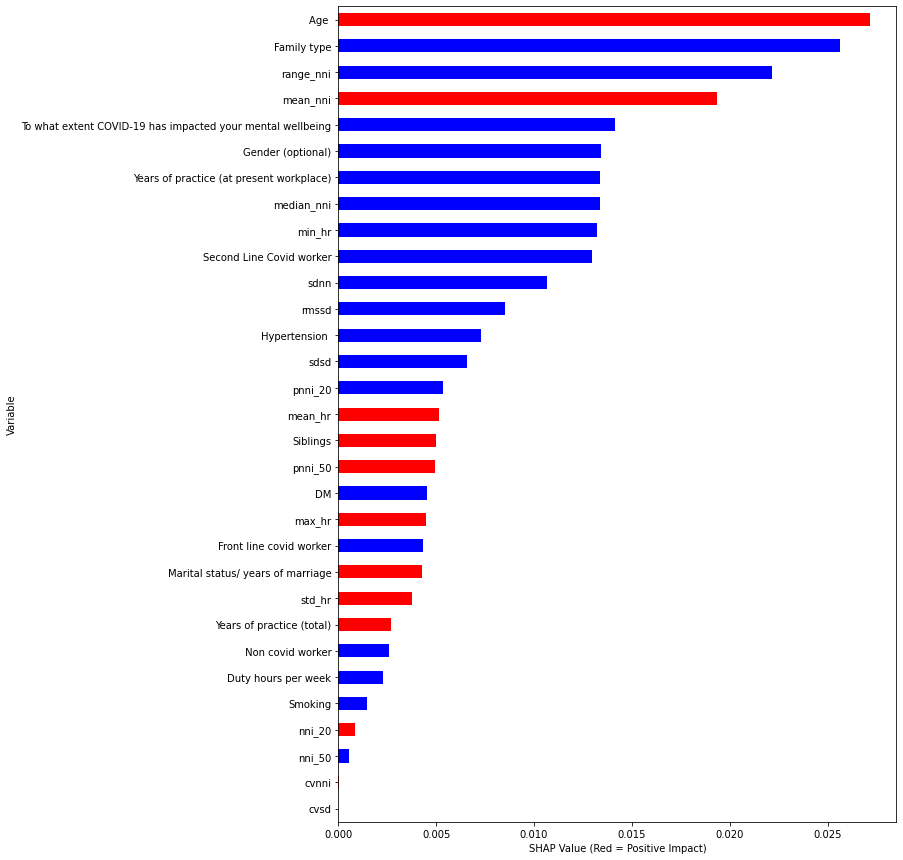

FOLD:  5


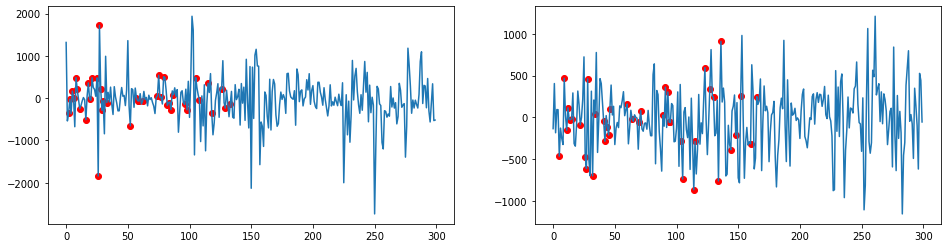

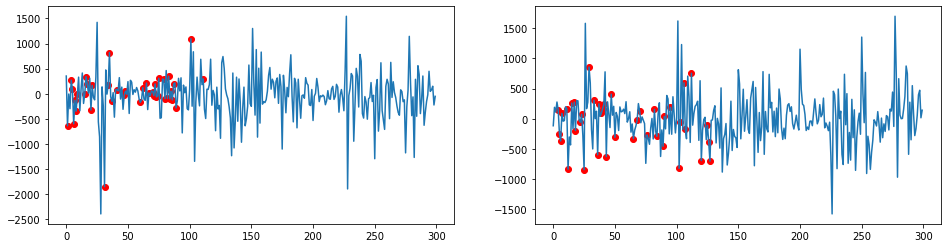

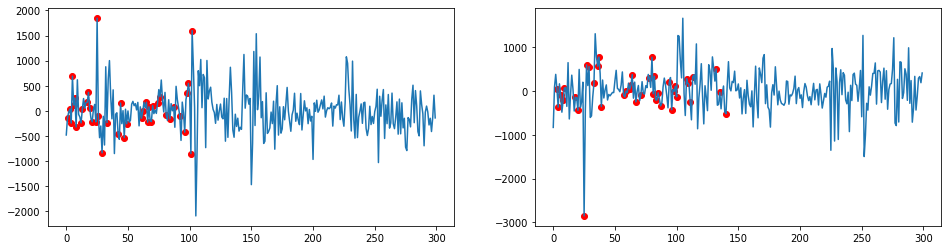

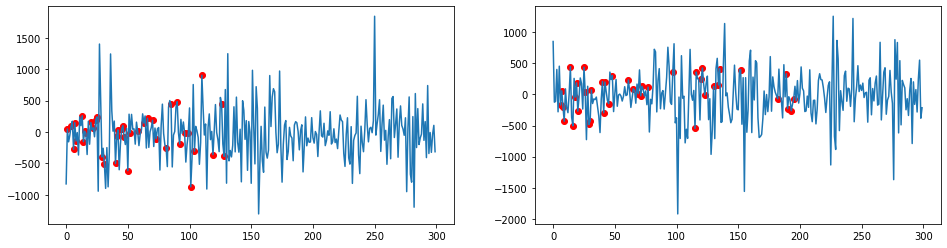

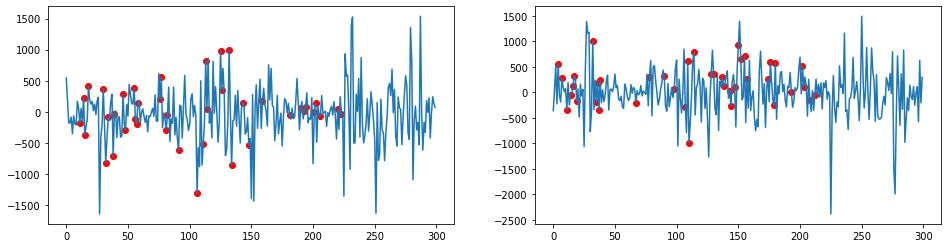

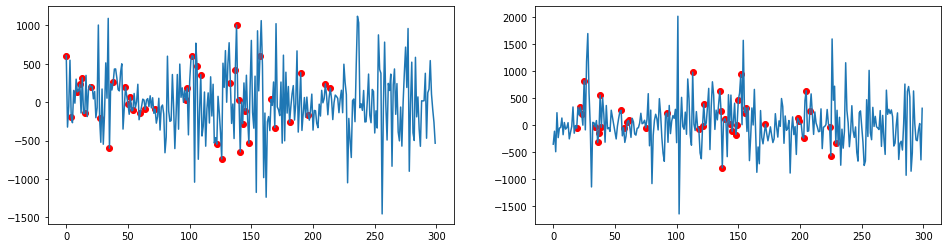

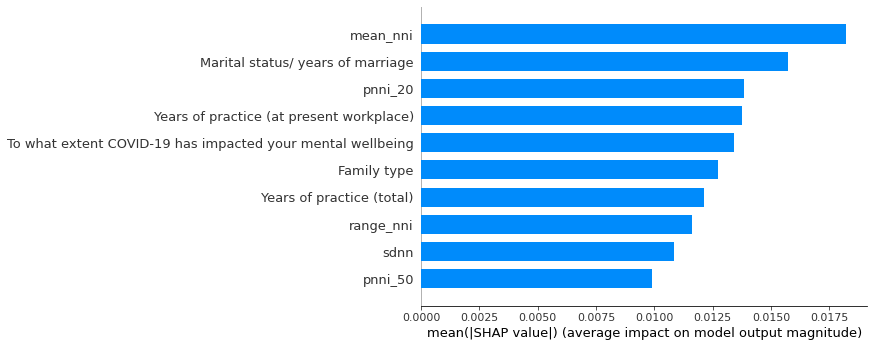

                                             Variable  SHAP_abs      Corr  Sign
0                                               cvnni  0.000063 -0.830712  blue
1                                                cvsd  0.000080 -0.858845  blue
16                                               Age   0.000134 -0.869573  blue
12                                              rmssd  0.000475 -0.858974  blue
30                                            Smoking  0.001645  0.846882   red
28                                                 DM  0.001771 -0.856385  blue
15                                             std_hr  0.001772  0.829765   red
3                                             mean_hr  0.002149 -0.845312  blue
6                                              min_hr  0.002271 -0.857227  blue
7                                              nni_20  0.002580 -0.873574  blue
23                            Front line covid worker  0.002641  0.863990   red
14                                      

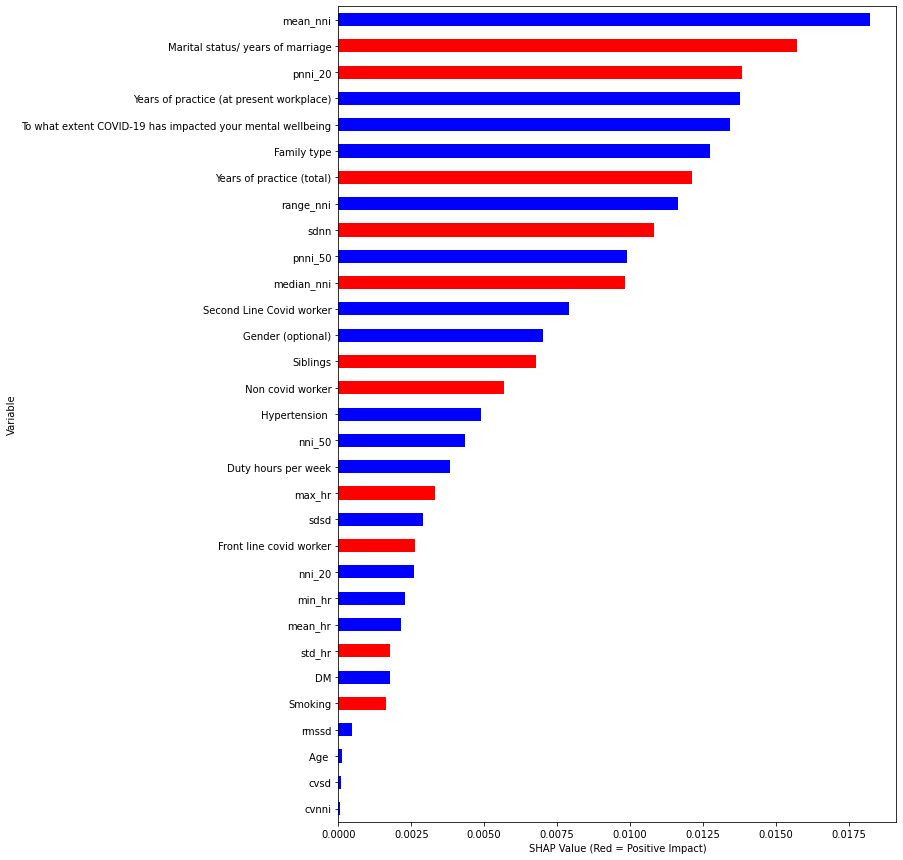

In [ ]:
CV_Shap()

## Inception Naive

FOLD:  1


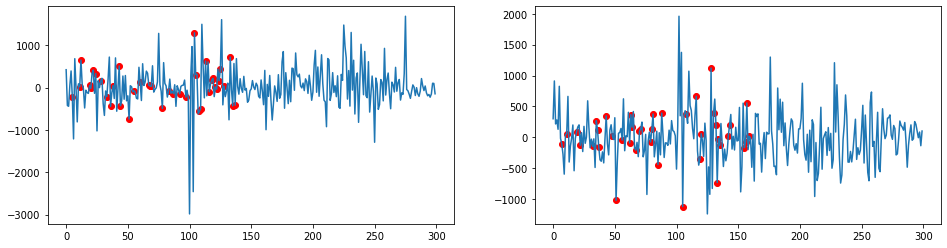

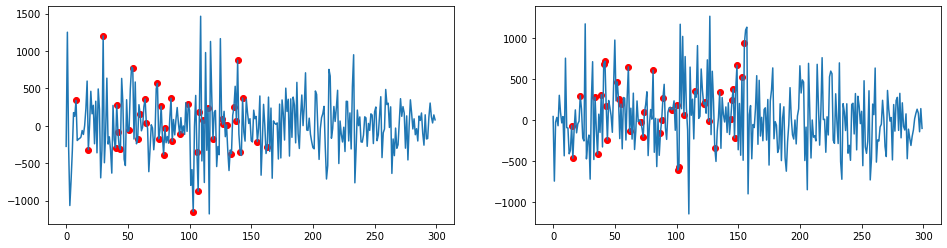

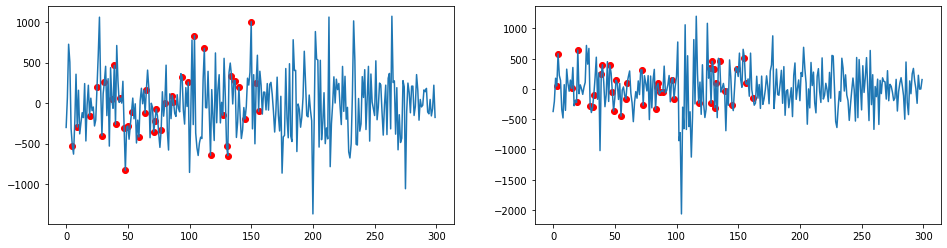

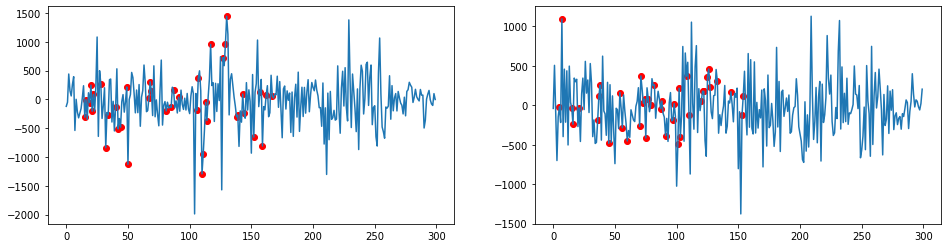

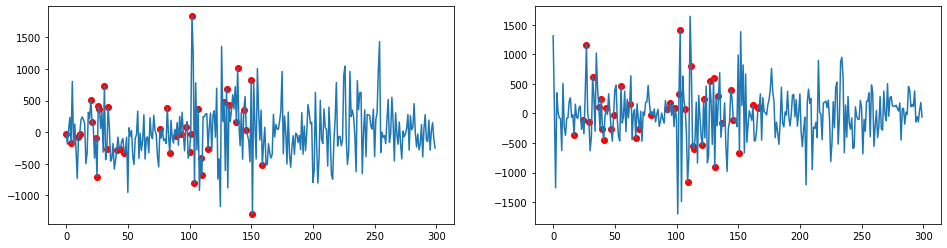

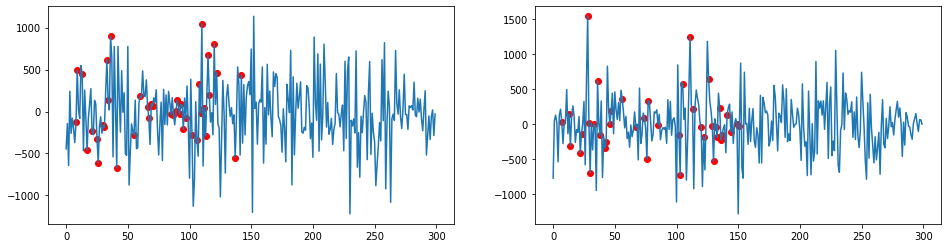

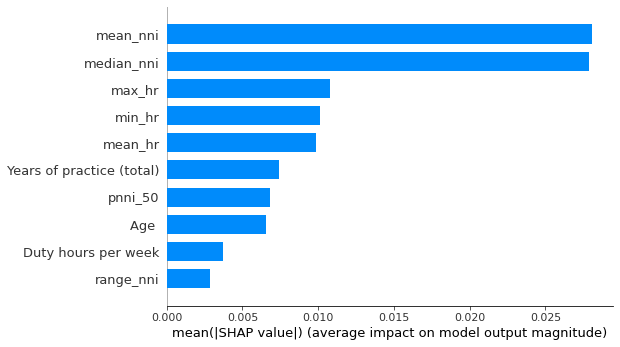

                                             Variable  SHAP_abs      Corr  Sign
1                                                cvsd  0.000003  0.387442   red
0                                               cvnni  0.000008  0.409574   red
30                                            Smoking  0.000030 -0.280414  blue
23                            Front line covid worker  0.000114 -0.339960  blue
28                                                 DM  0.000388 -0.390229  blue
8                                              nni_50  0.000427 -0.376699  blue
26  To what extent COVID-19 has impacted your ment...  0.000536 -0.404337  blue
29                                      Hypertension   0.000576 -0.431419  blue
7                                              nni_20  0.000588  0.378247   red
20                                        Family type  0.000701 -0.372392  blue
25                                   Non covid worker  0.000761  0.280042   red
27                                  Gend

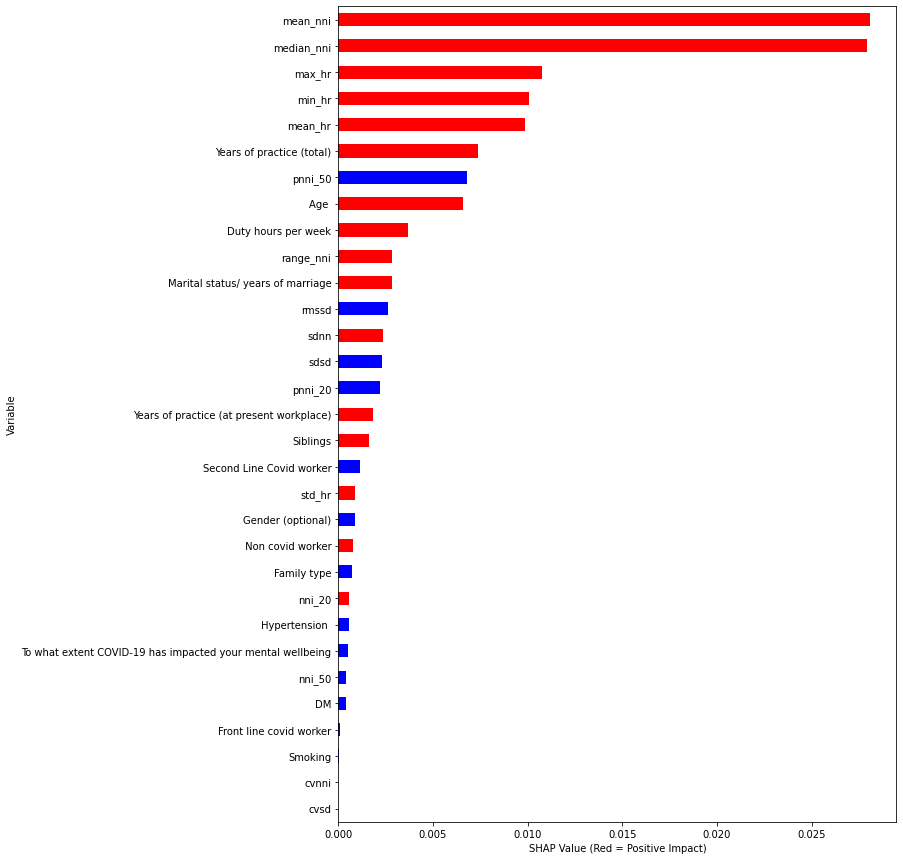

FOLD:  2


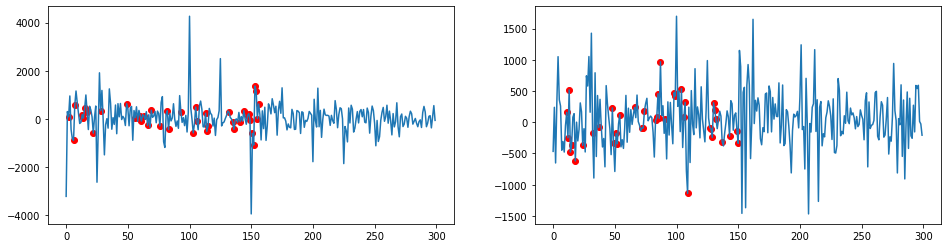

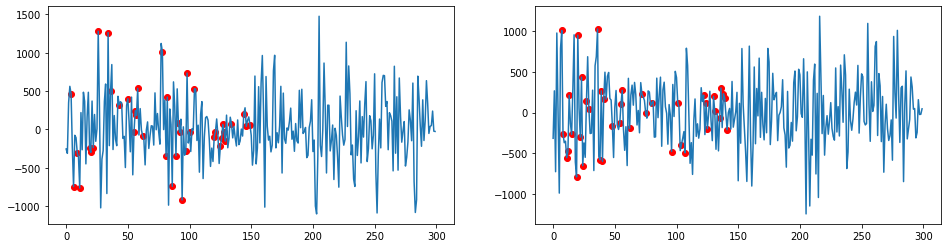

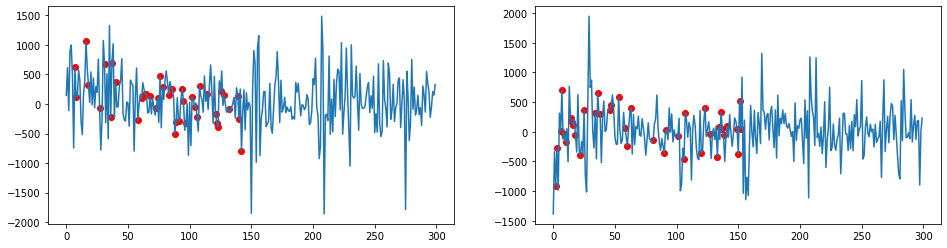

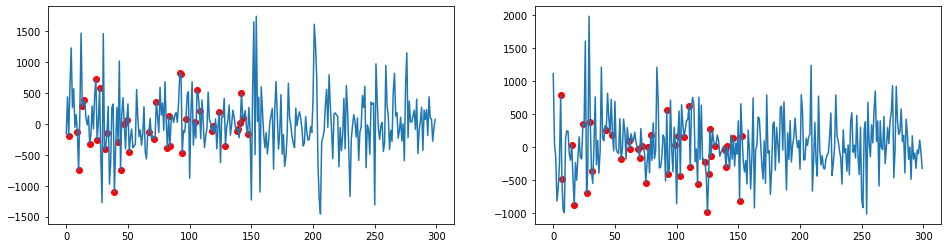

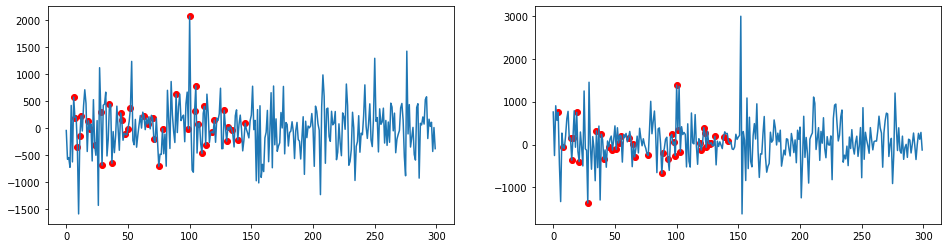

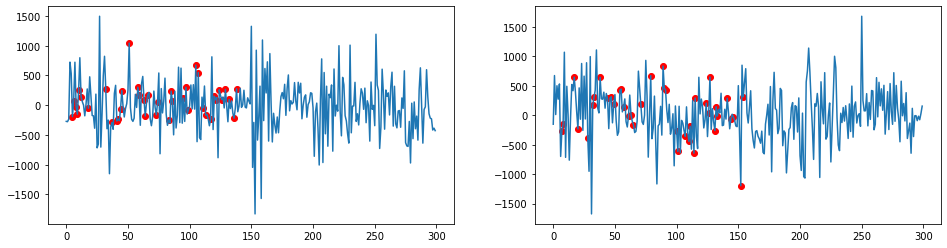

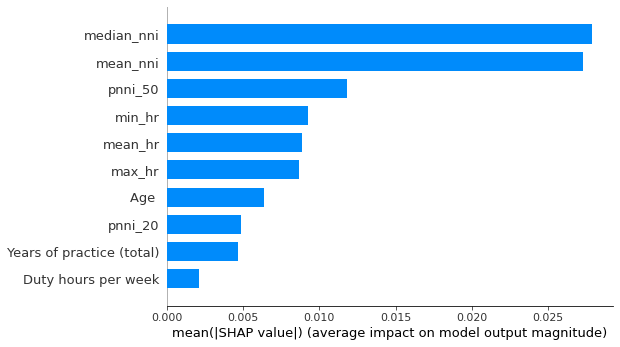

                                             Variable  SHAP_abs      Corr  Sign
1                                                cvsd  0.000003  0.262584   red
0                                               cvnni  0.000006  0.298557   red
30                                            Smoking  0.000027 -0.144822  blue
29                                      Hypertension   0.000154 -0.305732  blue
28                                                 DM  0.000170 -0.211569  blue
7                                              nni_20  0.000200  0.234379   red
23                            Front line covid worker  0.000296 -0.223134  blue
11                                          range_nni  0.000362 -0.215579  blue
26  To what extent COVID-19 has impacted your ment...  0.000425 -0.253061  blue
20                                        Family type  0.000472 -0.267346  blue
24                           Second Line Covid worker  0.000565 -0.231172  blue
27                                  Gend

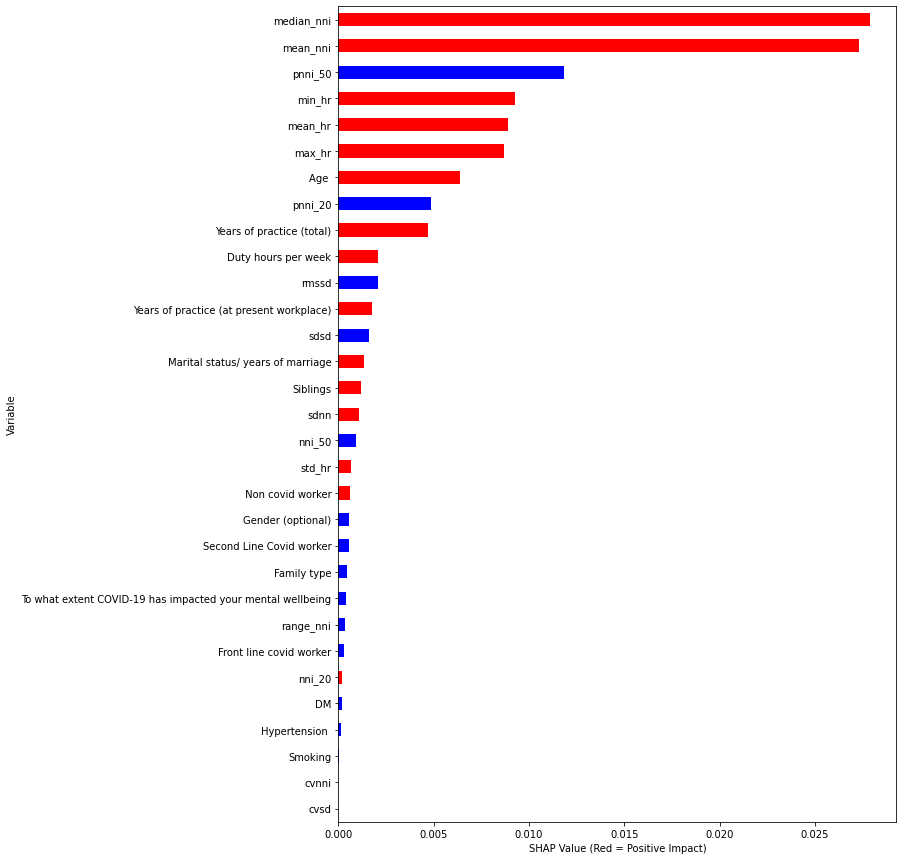

FOLD:  3


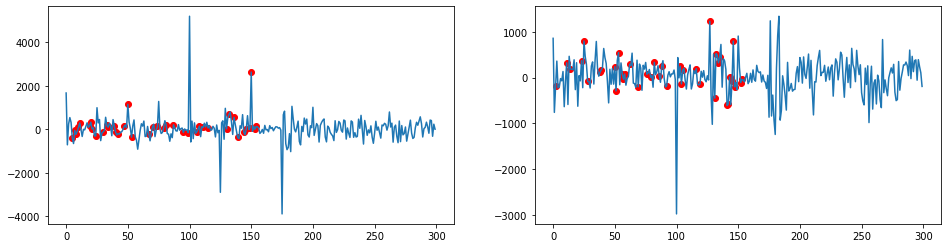

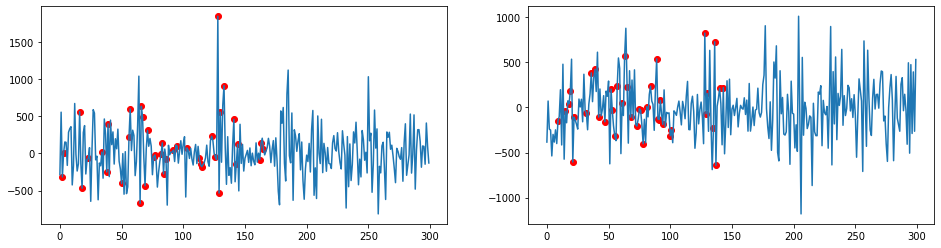

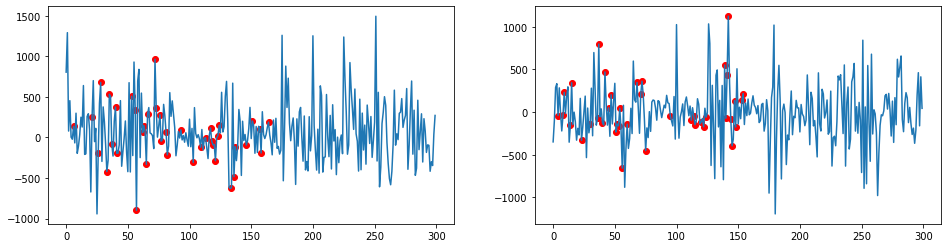

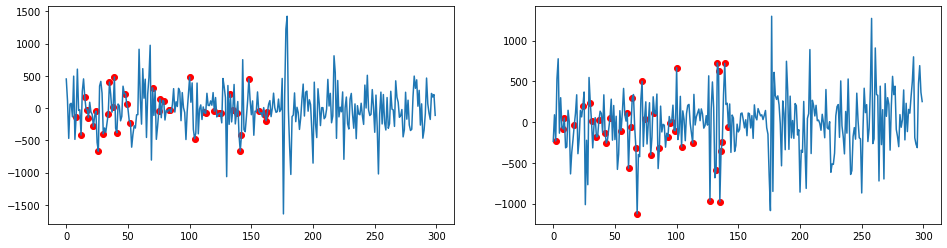

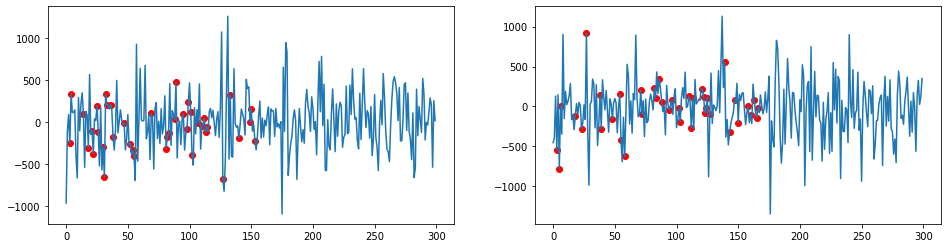

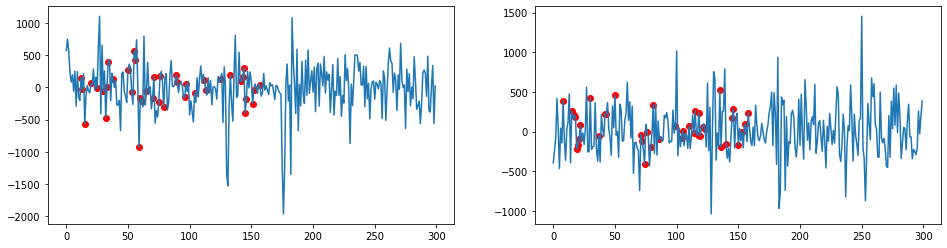

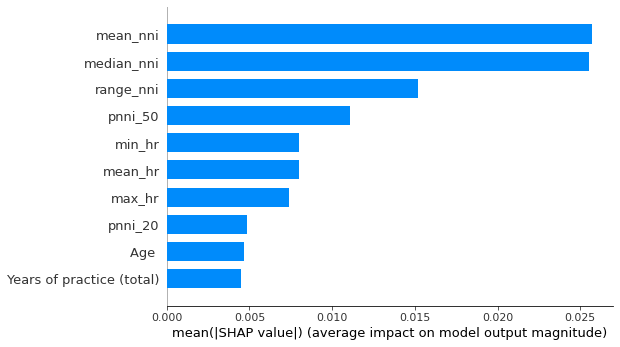

                                             Variable  SHAP_abs      Corr  Sign
1                                                cvsd  0.000004  0.174419   red
0                                               cvnni  0.000007  0.132400   red
30                                            Smoking  0.000031 -0.218009  blue
7                                              nni_20  0.000087  0.305414   red
28                                                 DM  0.000100 -0.278445  blue
23                            Front line covid worker  0.000132 -0.185694  blue
29                                      Hypertension   0.000184 -0.324391  blue
26  To what extent COVID-19 has impacted your ment...  0.000187 -0.168247  blue
20                                        Family type  0.000464 -0.236481  blue
27                                  Gender (optional)  0.000556 -0.209784  blue
25                                   Non covid worker  0.000637  0.233546   red
15                                      

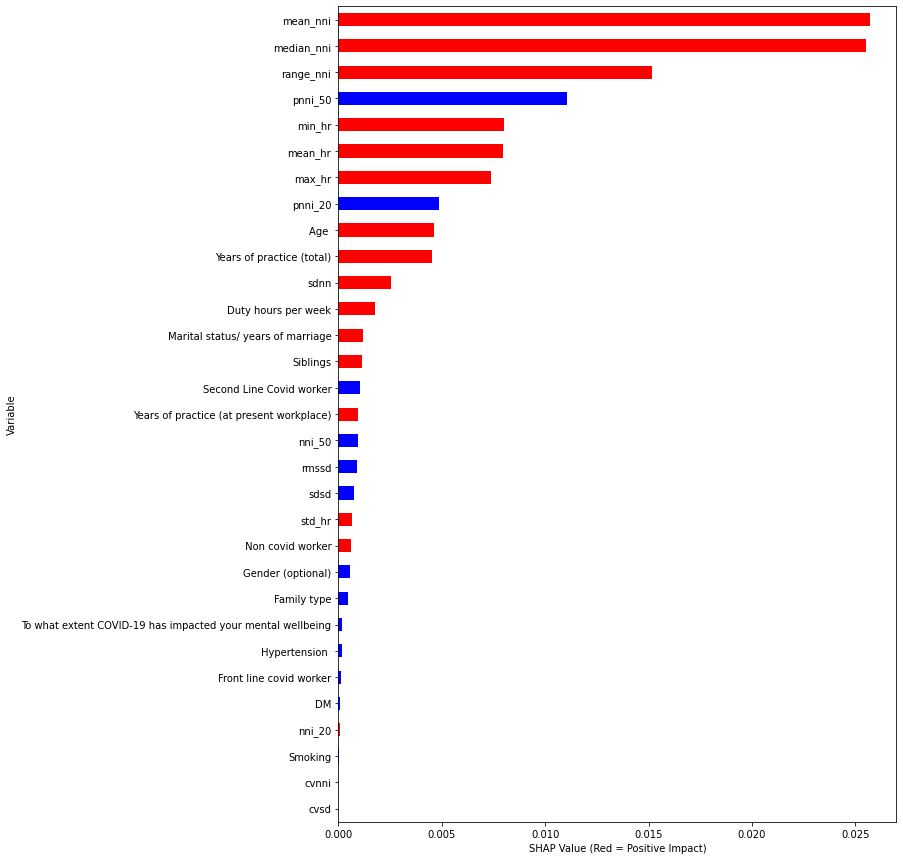

FOLD:  4


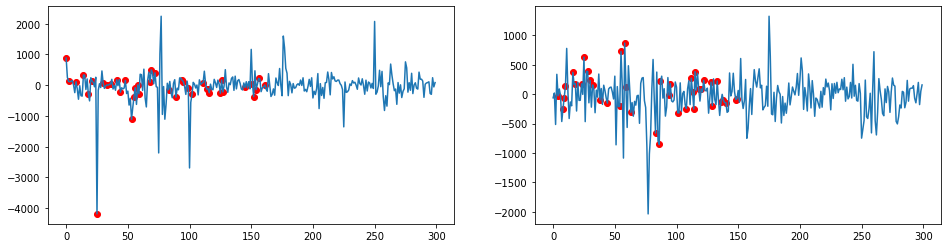

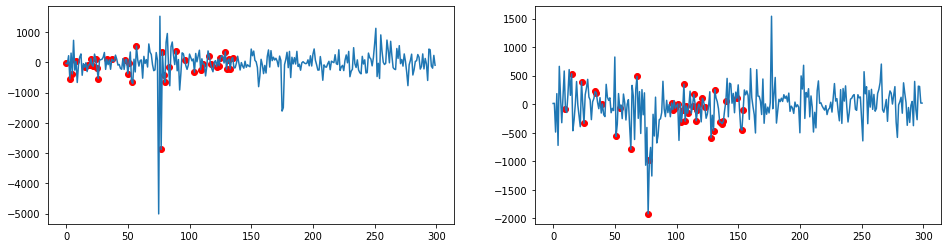

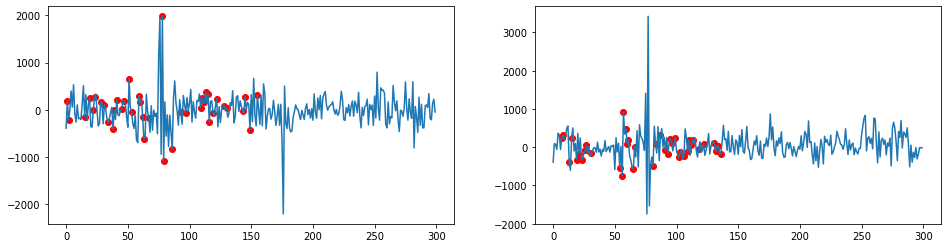

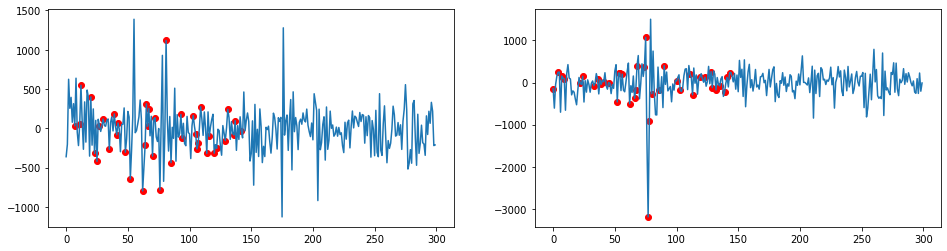

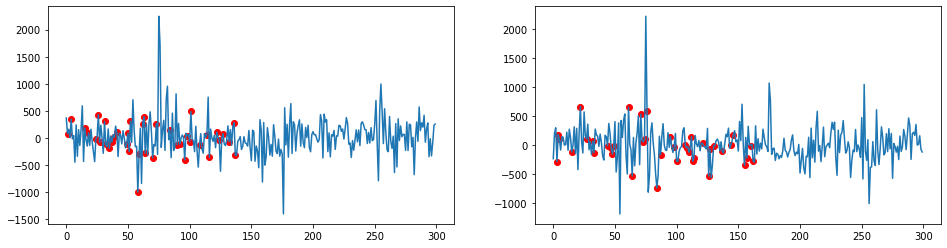

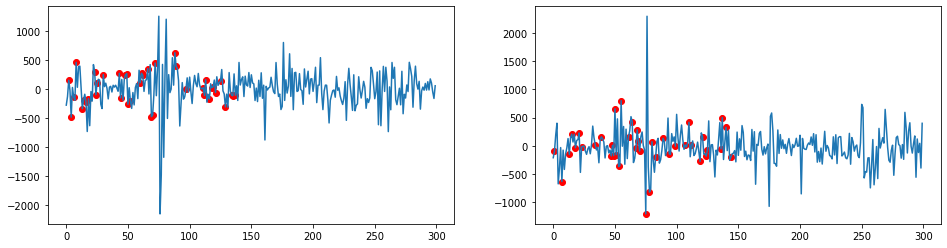

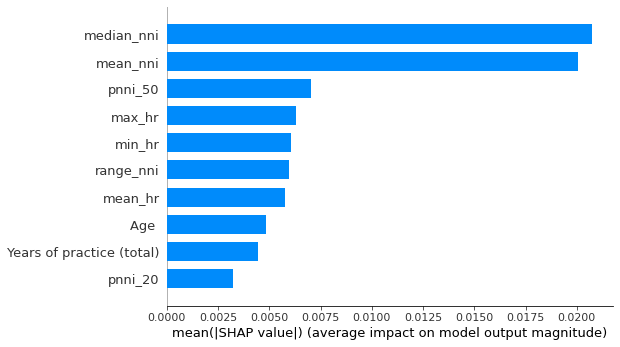

                                             Variable  SHAP_abs      Corr  Sign
1                                                cvsd  0.000002  0.146914   red
0                                               cvnni  0.000005  0.130462   red
30                                            Smoking  0.000020 -0.211680  blue
28                                                 DM  0.000107 -0.120016  blue
23                            Front line covid worker  0.000127 -0.246672  blue
7                                              nni_20  0.000140  0.261031   red
29                                      Hypertension   0.000172 -0.165130  blue
26  To what extent COVID-19 has impacted your ment...  0.000238 -0.217865  blue
25                                   Non covid worker  0.000379  0.187398   red
27                                  Gender (optional)  0.000406 -0.229617  blue
8                                              nni_50  0.000587 -0.240516  blue
15                                      

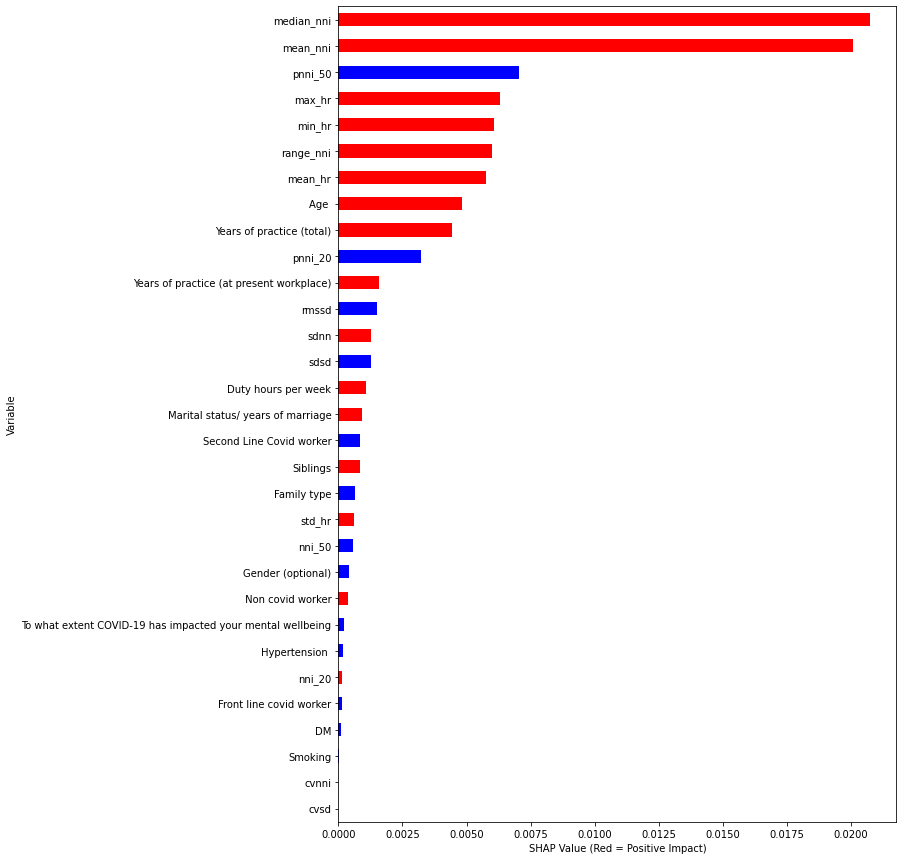

FOLD:  5


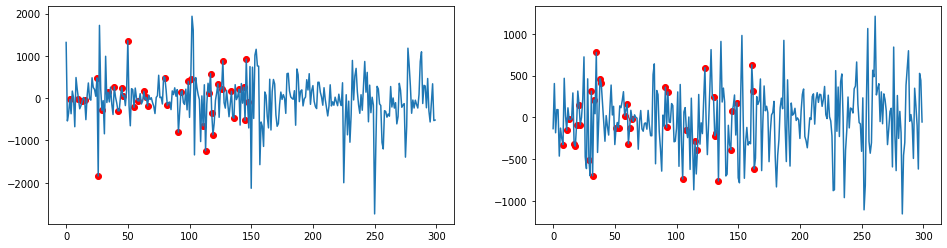

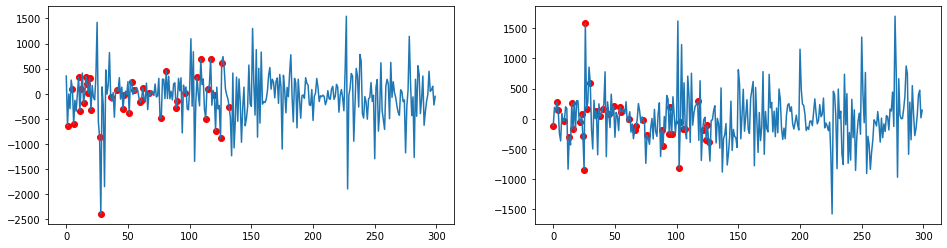

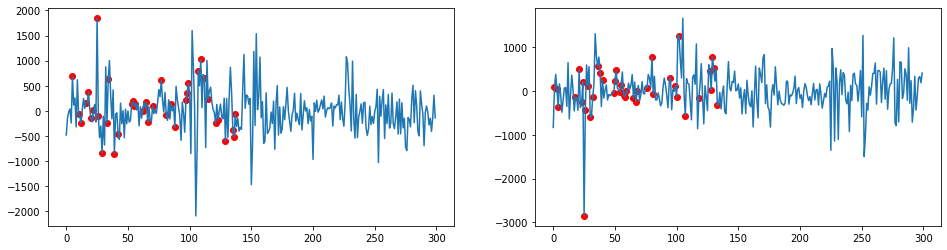

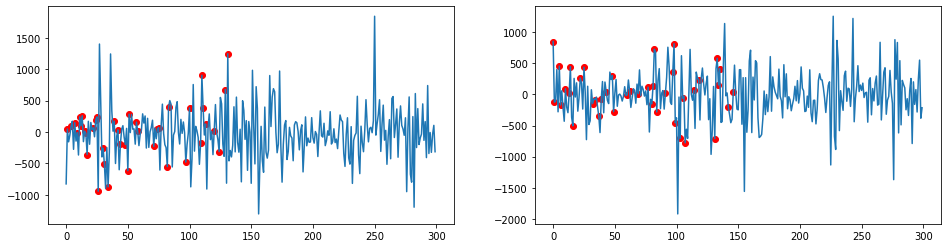

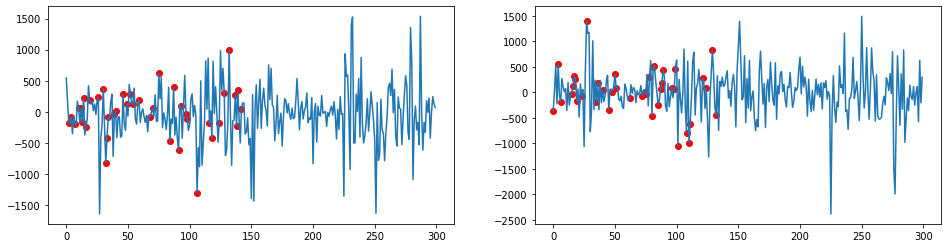

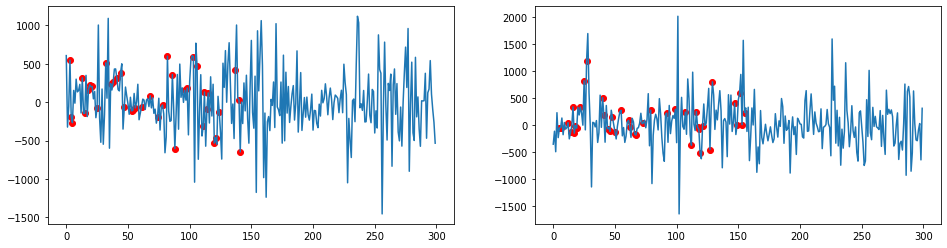

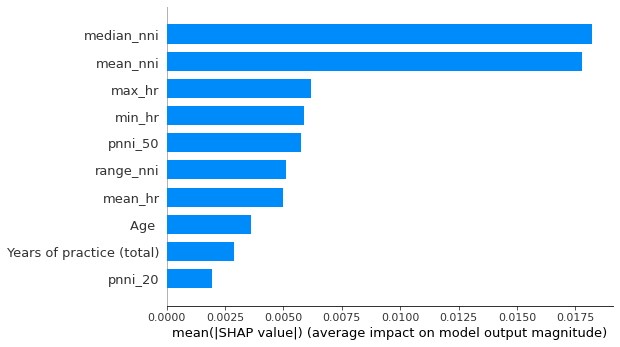

                                             Variable  SHAP_abs      Corr  Sign
1                                                cvsd  0.000002  0.164768   red
0                                               cvnni  0.000003  0.128837   red
30                                            Smoking  0.000011  0.207742   red
28                                                 DM  0.000038 -0.463893  blue
7                                              nni_20  0.000070  0.190411   red
29                                      Hypertension   0.000191 -0.242477  blue
23                            Front line covid worker  0.000227 -0.229578  blue
15                                             std_hr  0.000328  0.114195   red
26  To what extent COVID-19 has impacted your ment...  0.000345 -0.271739  blue
8                                              nni_50  0.000498 -0.146485  blue
14                                               sdsd  0.000525 -0.160537  blue
27                                  Gend

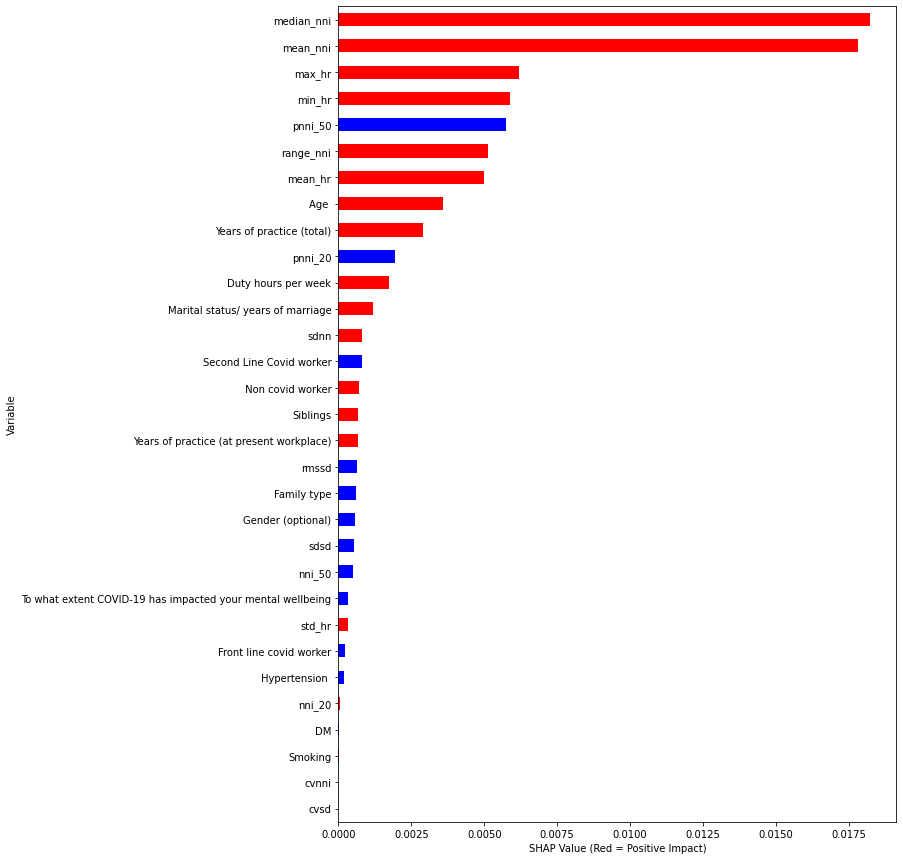

In [ ]:
CV_Shap()

# Reprint HeatMap

FOLD:  1


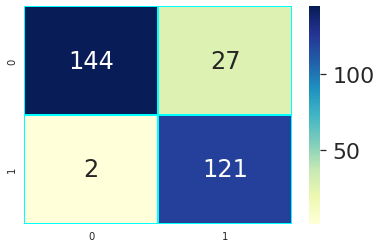

FOLD:  2


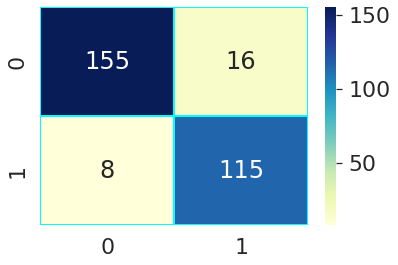

FOLD:  3


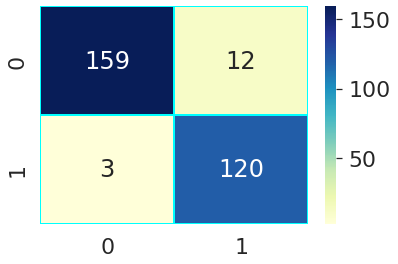

FOLD:  4


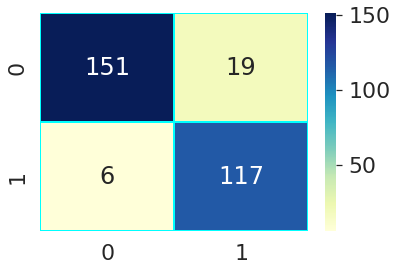

FOLD:  5


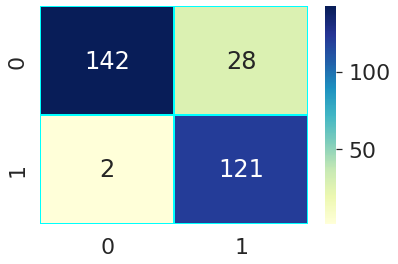

In [ ]:
C = 1
while C < 6:
    print('FOLD: ', C)

    # X_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_train_'+str(C+1))
    # y_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_train_'+str(C+1))
    # X_hrv_train = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_train_'+str(C))

    X_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_PCA_Test_'+str(C))
    y_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_Label_Test_'+str(C))
    y_test = change_labelling(y_test)
    X_hrv_test = joblib.load('/content/drive/MyDrive/Capstone_Work/Folds_Data/Fold_HRV_Test_'+str(C))

    y_test1=utils.to_categorical(y_test, num_classes)
    # y_train1=utils.to_categorical(y_train, num_classes)

    model = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAHRV__'+str(C)+'.h5')
    predictions = model.predict((X_test, X_hrv_test))
    y_pred = np.argmax(predictions, axis = 1)

    heatMap(y_test, y_pred, (6, 4))

    C+=1

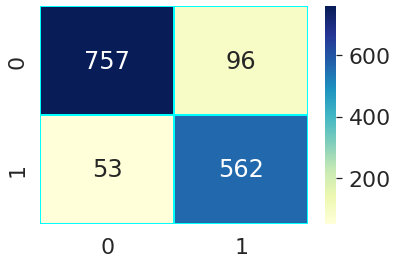

In [ ]:
log_cm = np.array([[757, 96], [53, 562]])
f, p = plt.subplots(figsize=(6, 4))
sn.set(font_scale=2) # for label size
sns.heatmap(log_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
# plt.title('Confusion Matrix', size=16)
# plt.xlabel(['Predicted Labels', 'p2'], size=14)
# plt.ylabel('Original Labels', size=14)
plt.show()